[View in Colaboratory](https://colab.research.google.com/github/Jhonbeltran/Fifa-18-similar-players/blob/master/fifa_18_data_set_kaggle.ipynb)

# Fifa 18 More Complete Player Dataset (Analytics)

## Conexión con la API de Kaggle para acceder el DataSet desde Colabority usando autenticación con Google Drive

In [1]:
!pip install kaggle

In [2]:
from googleapiclient.discovery import build
import io, os
from googleapiclient.http import MediaIoBaseDownload
from google.colab import auth
auth.authenticate_user()
drive_service = build('drive', 'v3')
results = drive_service.files().list(
        q="name = 'kaggle.json'", fields="files(id)").execute()
kaggle_api_key = results.get('files', [])
filename = "/content/.kaggle/kaggle.json"
os.makedirs(os.path.dirname(filename), exist_ok=True)
request = drive_service.files().get_media(fileId=kaggle_api_key[0]['id'])
fh = io.FileIO(filename, 'wb')
downloader = MediaIoBaseDownload(fh, request)
done = False
while done is False:
    status, done = downloader.next_chunk()
    print("Download %d%%." % int(status.progress() * 100))
os.chmod(filename, 600)

Download 100%.


### Descarga del DataSet

In [3]:
!kaggle datasets download -d kevinmh/fifa-18-more-complete-player-dataset -p /content/kaggle

fifa-18-more-complete-player-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


## Creación del Data Frame

In [4]:
import pandas as pd
import numpy as np
data = pd.read_csv('/content/kaggle/complete.csv', header=0, sep=',', quotechar='"')
data.head(27)

,ID,name,full_name,club,club_logo,special,age,league,birth_date,height_cm,...,prefers_cb,prefers_lb,prefers_lwb,prefers_ls,prefers_lf,prefers_lam,prefers_lcm,prefers_ldm,prefers_lcb,prefers_gk
0,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,Real Madrid CF,https://cdn.sofifa.org/18/teams/243.png,2228,32,Spanish Primera División,1985-02-05,185.0,...,False,False,False,False,False,False,False,False,False,False
1,158023,L. Messi,Lionel Messi,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2158,30,Spanish Primera División,1987-06-24,170.0,...,False,False,False,False,False,False,False,False,False,False
2,190871,Neymar,Neymar da Silva Santos Jr.,Paris Saint-Germain,https://cdn.sofifa.org/18/teams/73.png,2100,25,French Ligue 1,1992-02-05,175.0,...,False,False,False,False,False,False,False,False,False,False
3,176580,L. Suárez,Luis Suárez,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2291,30,Spanish Primera División,1987-01-24,182.0,...,False,False,False,False,False,False,False,False,False,False
4,167495,M. Neuer,Manuel Neuer,FC Bayern Munich,https://cdn.sofifa.org/18/teams/21.png,1493,31,German Bundesliga,1986-03-27,193.0,...,False,False,False,False,False,False,False,False,False,True
5,188545,R. Lewandowski,Robert Lewandowski,FC Bayern Munich,https://cdn.sofifa.org/18/teams/21.png,2146,28,German Bundesliga,1988-08-21,185.0,...,False,False,False,False,False,False,False,False,False,False
6,193080,De Gea,David De Gea Quintana,Manchester United,https://cdn.sofifa.org/18/teams/11.png,1458,26,English Premier League,1990-11-07,193.0,...,False,False,False,False,False,False,False,False,False,True
7,183277,E. Hazard,Eden Hazard,Chelsea,https://cdn.sofifa.org/18/teams/5.png,2096,26,English Premier League,1991-01-07,173.0,...,False,False,False,False,False,False,False,False,False,False
8,182521,T. Kroos,Toni Kroos,Real Madrid CF,https://cdn.sofifa.org/18/teams/243.png,2165,27,Spanish Primera División,1990-01-04,182.0,...,False,False,False,False,False,False,False,False,False,False
9,167664,G. Higuaín,Gonzalo Higuaín,Juventus,https://cdn.sofifa.org/18/teams/45.png,1961,29,Italian Serie A,1987-12-10,184.0,...,False,False,False,False,False,False,False,False,False,False


## Analisis Exploratorio de los datos

***Dimenciones del DataSet***

In [5]:
data.shape

(17994, 185)

***Algunas columnas del DataSet***

In [6]:
data.columns

Index(['ID', 'name', 'full_name', 'club', 'club_logo', 'special', 'age',
       'league', 'birth_date', 'height_cm',
       ...
       'prefers_cb', 'prefers_lb', 'prefers_lwb', 'prefers_ls', 'prefers_lf',
       'prefers_lam', 'prefers_lcm', 'prefers_ldm', 'prefers_lcb',
       'prefers_gk'],
      dtype='object', length=185)

***Revisión de Indices***

In [7]:
data.index

RangeIndex(start=0, stop=17994, step=1)

***Como se ve el indice de un jugador***

In [0]:
#messi = data.loc[1,:]
#messi

### Separación de variables según su tipo

>* ***Vamos a discriminar datos del club o nacionalidad debido a que nuestra intención principal es buscar jugadores similares sin importar su procendencia, con la intención de descubirir talentos no contemplados al enfocarnos solamente en ligas de renombre.***




In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17994 entries, 0 to 17993
Columns: 185 entries, ID to prefers_gk
dtypes: bool(92), float64(32), int64(48), object(13)
memory usage: 14.3+ MB


### Mascara de datos obj (Cadenas de Texto)

In [10]:
obj = (data.dtypes == object)
obj_cols = [c for c in obj.index if obj[c]]
type(obj_cols)

useless_obj = ['name', 'club', 'club_logo', 'league','flag', 'nationality', 'photo', 'body_type', 'birth_date', 'work_rate_att', 'work_rate_def']

for item in useless_obj:
  obj_cols.remove(item)
  
print(obj_cols)

print("""
Valores de {}
{}""".format(obj_cols[1], data['preferred_foot'].value_counts()))
print(obj_cols)
      

['full_name', 'preferred_foot']

Valores de preferred_foot
Right    13743
Left      4251
Name: preferred_foot, dtype: int64
['full_name', 'preferred_foot']


### Mascara de datos bool

Para este caso en nuestro modelo no vamos a tener en cuenta los datos booleanos porque describen una caracteristica propia de cada jugador, lo cual puede llevarnos a pensar que un jugador no es similar a otro aunque tengan puntajes de cada posicion muy similar.

In [11]:
boolean = (data.dtypes == bool)
boolean_cols = [c for c in boolean.index if boolean[c]]
len(boolean_cols)
print(boolean_cols)

['real_face', '1_on_1_rush_trait', 'acrobatic_clearance_trait', 'argues_with_officials_trait', 'avoids_using_weaker_foot_trait', 'backs_into_player_trait', 'bicycle_kicks_trait', 'cautious_with_crosses_trait', 'chip_shot_trait', 'chipped_penalty_trait', 'comes_for_crosses_trait', 'corner_specialist_trait', 'diver_trait', 'dives_into_tackles_trait', 'diving_header_trait', 'driven_pass_trait', 'early_crosser_trait', "fan's_favourite_trait", 'fancy_flicks_trait', 'finesse_shot_trait', 'flair_trait', 'flair_passes_trait', 'gk_flat_kick_trait', 'gk_long_throw_trait', 'gk_up_for_corners_trait', 'giant_throw_in_trait', 'inflexible_trait', 'injury_free_trait', 'injury_prone_trait', 'leadership_trait', 'long_passer_trait', 'long_shot_taker_trait', 'long_throw_in_trait', 'one_club_player_trait', 'outside_foot_shot_trait', 'playmaker_trait', 'power_free_kick_trait', 'power_header_trait', 'puncher_trait', 'rushes_out_of_goal_trait', 'saves_with_feet_trait', 'second_wind_trait', 'selfish_trait', 's

### Mascara de datos númericos

**Special Feature**

Este valor es referente a lo especial que es el jugador en el mercado, lo cual nos lleva de nuevo a establecer que no es un dato que queremos evaluar, pues nuestra intención es encontrar alternativas nuevas.

In [12]:
data[['full_name','special']].tail()

,full_name,special
17989,Adam Kelsey,755
17990,Barry Richardson,832
17991,Jordan Young,1194
17992,Josh Lundstram,1302
17993,Leslie Sackey,1031


In [13]:
num = (data.dtypes == float) | (data.dtypes == int)
num_cols = [c for c in num.index if num[c]==True]

#Removemos reputación internacional por lo que ya destacabamos de descubrir talentos
useless_num = ['special','eur_value', 'eur_wage', 'eur_release_clause', 'international_reputation', 'sho', 'pas', 'dri', 'def', 'phy', 'skill_moves',  'composure', 'pac', 'ID']

for item in useless_num:
  num_cols.remove(item)
  
len(num_cols)
print(num_cols)

['age', 'height_cm', 'weight_kg', 'overall', 'potential', 'weak_foot', 'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy', 'long_passing', 'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots', 'aggression', 'interceptions', 'positioning', 'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes', 'rs', 'rw', 'rf', 'ram', 'rcm', 'rm', 'rdm', 'rcb', 'rb', 'rwb', 'st', 'lw', 'cf', 'cam', 'cm', 'lm', 'cdm', 'cb', 'lb', 'lwb', 'ls', 'lf', 'lam', 'lcm', 'ldm', 'lcb', 'gk']


In [14]:
data_obj = data[obj_cols]
data_obj.head(1)

,full_name,preferred_foot
0,C. Ronaldo dos Santos Aveiro,Right


In [15]:
data_bool = data[boolean_cols]
data_bool.head(1)

,real_face,1_on_1_rush_trait,acrobatic_clearance_trait,argues_with_officials_trait,avoids_using_weaker_foot_trait,backs_into_player_trait,bicycle_kicks_trait,cautious_with_crosses_trait,chip_shot_trait,chipped_penalty_trait,...,prefers_cb,prefers_lb,prefers_lwb,prefers_ls,prefers_lf,prefers_lam,prefers_lcm,prefers_ldm,prefers_lcb,prefers_gk
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [16]:
data_num = data[num_cols]
data_num.head(1)

,age,height_cm,weight_kg,overall,potential,weak_foot,crossing,finishing,heading_accuracy,short_passing,...,cb,lb,lwb,ls,lf,lam,lcm,ldm,lcb,gk
0,32,185.0,80.0,94,94,4,85,94,88,83,...,53.0,61.0,66.0,92.0,91.0,89.0,82.0,62.0,53.0,NaN


In [17]:
data_num.describe()

,age,height_cm,weight_kg,overall,potential,weak_foot,crossing,finishing,heading_accuracy,short_passing,...,cb,lb,lwb,ls,lf,lam,lcm,ldm,lcb,gk
count,17994.000000,17994.000000,17994.000000,17994.000000,17994.000000,17994.000000,17994.000000,17994.000000,17994.000000,17994.000000,...,15973.000000,15973.000000,15973.000000,15973.000000,15973.000000,15973.000000,15973.000000,15973.000000,15973.000000,2021.000000
mean,25.120151,181.271980,75.400856,66.253029,71.200400,2.948927,49.806046,45.330388,52.379293,58.338891,...,55.553747,56.990985,57.710574,58.216115,59.042384,59.262819,58.515244,56.871220,55.553747,64.714003
std,4.617428,6.690392,6.994824,6.946729,6.082015,0.661107,18.436764,19.479680,17.395498,14.867599,...,12.183008,9.773546,9.119380,9.162295,9.898161,9.845668,8.844482,10.285525,12.183008,7.661938
min,16.000000,155.000000,49.000000,46.000000,46.000000,1.000000,5.000000,2.000000,4.000000,10.000000,...,25.000000,30.000000,31.000000,31.000000,27.000000,27.000000,30.000000,26.000000,25.000000,46.000000
25%,21.000000,177.000000,70.000000,62.000000,67.000000,3.000000,38.000000,29.000000,45.000000,53.000000,...,45.000000,50.000000,51.000000,52.000000,53.000000,53.000000,53.000000,49.000000,45.000000,59.000000
50%,25.000000,181.000000,75.000000,66.000000,71.000000,3.000000,54.000000,48.000000,56.000000,62.000000,...,57.000000,58.000000,58.000000,59.000000,60.000000,60.000000,59.000000,58.000000,57.000000,65.000000
75%,28.000000,186.000000,80.000000,71.000000,75.000000,3.000000,64.000000,61.750000,64.000000,68.000000,...,65.000000,64.000000,64.000000,65.000000,66.000000,66.000000,65.000000,65.000000,65.000000,70.000000
max,47.000000,205.000000,110.000000,94.000000,94.000000,5.000000,90.000000,95.000000,94.000000,92.000000,...,87.000000,84.000000,85.000000,92.000000,92.000000,92.000000,87.000000,85.000000,87.000000,92.000000


### Entiendiendo los datos con Gráficas

Text(0,0.5,'# Characters')

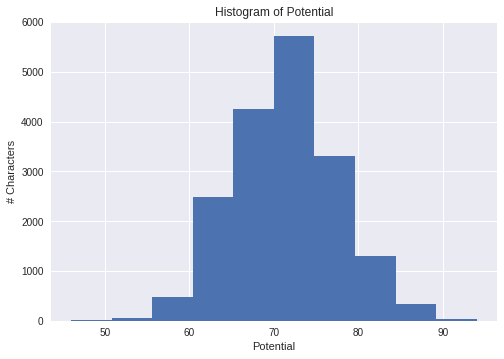

In [18]:
pote_hist = data_num['potential'].hist()
pote_hist.set_title("Histogram of Potential")
pote_hist.set_xlabel("Potential")
pote_hist.set_ylabel("# Characters")

Text(0,0.5,'# Characters')

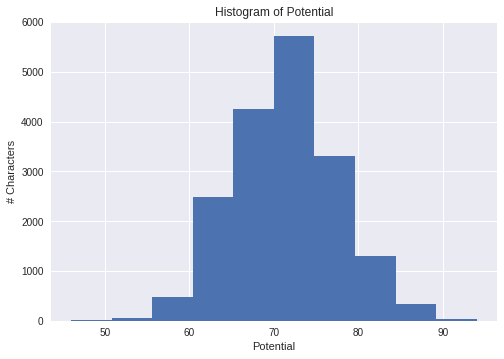

In [19]:
pote_hist = data_num['potential'].hist()
pote_hist.set_title("Histogram of Potential")
pote_hist.set_xlabel("Potential")
pote_hist.set_ylabel("# Characters")

Text(0,0.5,'# Characters')

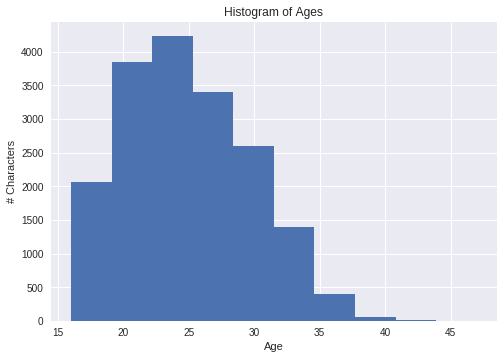

In [20]:
age_hist = data_num['age'].hist()
age_hist.set_title("Histogram of Ages")
age_hist.set_xlabel("Age")
age_hist.set_ylabel("# Characters")

Text(0,0.5,'# Characters')

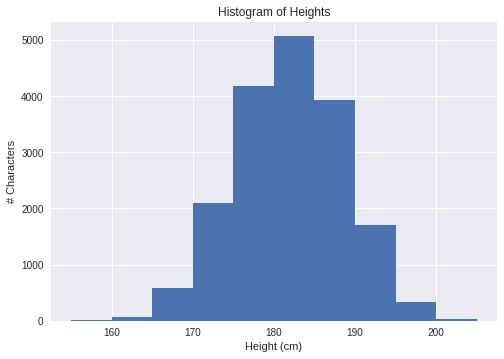

In [21]:
age_hist = data_num['height_cm'].hist()
age_hist.set_title("Histogram of Heights")
age_hist.set_xlabel("Height (cm)")
age_hist.set_ylabel("# Characters")

Text(0,0.5,'# Characters')

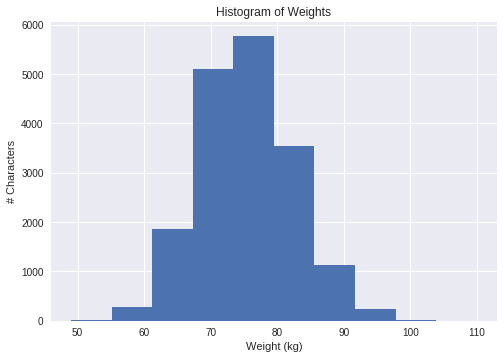

In [22]:
age_hist = data_num['weight_kg'].hist()
age_hist.set_title("Histogram of Weights")
age_hist.set_xlabel("Weight (kg)")
age_hist.set_ylabel("# Characters")

In [0]:
comparison_data = data[obj_cols + num_cols]

In [24]:
comparison_data.head()

,full_name,preferred_foot,age,height_cm,weight_kg,overall,potential,weak_foot,crossing,finishing,...,cb,lb,lwb,ls,lf,lam,lcm,ldm,lcb,gk
0,C. Ronaldo dos Santos Aveiro,Right,32,185.0,80.0,94,94,4,85,94,...,53.0,61.0,66.0,92.0,91.0,89.0,82.0,62.0,53.0,NaN
1,Lionel Messi,Left,30,170.0,72.0,93,93,4,77,95,...,45.0,57.0,62.0,88.0,92.0,92.0,84.0,59.0,45.0,NaN
2,Neymar da Silva Santos Jr.,Right,25,175.0,68.0,92,94,5,75,89,...,46.0,59.0,64.0,84.0,88.0,88.0,79.0,59.0,46.0,NaN
3,Luis Suárez,Right,30,182.0,86.0,92,92,4,77,94,...,58.0,64.0,68.0,88.0,88.0,87.0,80.0,65.0,58.0,NaN
4,Manuel Neuer,Right,31,193.0,92.0,92,92,4,15,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.0


In [25]:
data.shape

(17994, 185)

In [26]:
comparison_data.shape

(17994, 68)

In [27]:
comparison_data.columns

Index(['full_name', 'preferred_foot', 'age', 'height_cm', 'weight_kg',
       'overall', 'potential', 'weak_foot', 'crossing', 'finishing',
       'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve',
       'free_kick_accuracy', 'long_passing', 'ball_control', 'acceleration',
       'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power',
       'jumping', 'stamina', 'strength', 'long_shots', 'aggression',
       'interceptions', 'positioning', 'vision', 'penalties', 'marking',
       'standing_tackle', 'sliding_tackle', 'gk_diving', 'gk_handling',
       'gk_kicking', 'gk_positioning', 'gk_reflexes', 'rs', 'rw', 'rf', 'ram',
       'rcm', 'rm', 'rdm', 'rcb', 'rb', 'rwb', 'st', 'lw', 'cf', 'cam', 'cm',
       'lm', 'cdm', 'cb', 'lb', 'lwb', 'ls', 'lf', 'lam', 'lcm', 'ldm', 'lcb',
       'gk'],
      dtype='object')

full_name, work_rate_att, work_rate_def, ID, pac, sho, pas, dri, def, phy, skill_moves,  composure

In [28]:
messi = comparison_data.loc[1,:]
messi

full_name             Lionel Messi
preferred_foot                Left
age                             30
height_cm                      170
weight_kg                       72
overall                         93
potential                       93
weak_foot                        4
crossing                        77
finishing                       95
heading_accuracy                71
short_passing                   88
volleys                         85
dribbling                       97
curve                           89
free_kick_accuracy              90
long_passing                    87
ball_control                    95
acceleration                    92
sprint_speed                    87
agility                         90
reactions                       95
balance                         95
shot_power                      85
jumping                         68
stamina                         73
strength                        59
long_shots                      88
aggression          

**Convirtiendo valores de tipo obj a bool**

In [29]:
comparison_data = comparison_data.rename(index=str, columns={"preferred_foot": "prefered_foot_left"})
comparison_data['prefered_foot_left'] = comparison_data['prefered_foot_left'].replace({'Left': 1, 'Right': 0})
comparison_data.head()

,full_name,prefered_foot_left,age,height_cm,weight_kg,overall,potential,weak_foot,crossing,finishing,...,cb,lb,lwb,ls,lf,lam,lcm,ldm,lcb,gk
0,C. Ronaldo dos Santos Aveiro,0,32,185.0,80.0,94,94,4,85,94,...,53.0,61.0,66.0,92.0,91.0,89.0,82.0,62.0,53.0,NaN
1,Lionel Messi,1,30,170.0,72.0,93,93,4,77,95,...,45.0,57.0,62.0,88.0,92.0,92.0,84.0,59.0,45.0,NaN
2,Neymar da Silva Santos Jr.,0,25,175.0,68.0,92,94,5,75,89,...,46.0,59.0,64.0,84.0,88.0,88.0,79.0,59.0,46.0,NaN
3,Luis Suárez,0,30,182.0,86.0,92,92,4,77,94,...,58.0,64.0,68.0,88.0,88.0,87.0,80.0,65.0,58.0,NaN
4,Manuel Neuer,0,31,193.0,92.0,92,92,4,15,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.0


In [30]:
"""def hamdist(str1, str2):
  diffs = 0
  for ch1, ch2 in zip(str1, str2):
    if ch1 != ch2:
      diffs += 1
      
  return diffs"""


'def hamdist(str1, str2):\n  diffs = 0\n  for ch1, ch2 in zip(str1, str2):\n    if ch1 != ch2:\n      diffs += 1\n      \n  return diffs'

## Comparación de prueba paso 4

In [31]:
jugador1 = comparison_data.loc[comparison_data['full_name'].isin(['Neymar da Silva Santos Jr.'])]
jugador2 = comparison_data.loc[comparison_data['full_name'].isin(['Lionel Messi'])]

jugador1 = jugador1.drop('full_name',axis=1)
print(jugador1.columns)
jugador2 = jugador2.drop('full_name',axis=1)

Index(['prefered_foot_left', 'age', 'height_cm', 'weight_kg', 'overall',
       'potential', 'weak_foot', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes', 'rs', 'rw', 'rf', 'ram', 'rcm', 'rm', 'rdm', 'rcb', 'rb',
       'rwb', 'st', 'lw', 'cf', 'cam', 'cm', 'lm', 'cdm', 'cb', 'lb', 'lwb',
       'ls', 'lf', 'lam', 'lcm', 'ldm', 'lcb', 'gk'],
      dtype='object')


### Score Comparación de Similitud

In [0]:
diff = []
for i in range(len(jugador1.values[0])):
  
  if (abs(jugador1.values[0][i] - jugador2.values[0][i])) < 3:
    diff.append(1)
  else:
    diff.append(0)

In [33]:
suma = 0
for el in diff:
  suma += el
  
  
suma

24

## Busqueda de posiciones importantes

In [34]:
jugador1.columns

Index(['prefered_foot_left', 'age', 'height_cm', 'weight_kg', 'overall',
       'potential', 'weak_foot', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes', 'rs', 'rw', 'rf', 'ram', 'rcm', 'rm', 'rdm', 'rcb', 'rb',
       'rwb', 'st', 'lw', 'cf', 'cam', 'cm', 'lm', 'cdm', 'cb', 'lb', 'lwb',
       'ls', 'lf', 'lam', 'lcm', 'ldm', 'lcb', 'gk'],
      dtype='object')

In [35]:
#df.loc[:, 'foo':'sat']
jugador_pos = jugador1[['rs', 'rw', 'rf', 'ram', 'rcm', 'rm', 'rdm', 'rcb', 'rb',
       'rwb', 'st', 'lw', 'cf', 'cam', 'cm', 'lm', 'cdm', 'cb', 'lb', 'lwb',
       'ls', 'lf', 'lam', 'lcm', 'ldm', 'lcb', 'gk']]
jugador_pos.head()
type(jugador_pos)

pandas.core.frame.DataFrame

In [36]:
features_target = []
for i in range(3):
  features_target.append(jugador_pos.idxmax(axis = 1)[0])
  jugador_pos = jugador_pos.drop(features_target[i], axis=1)
  
features_target

['rw', 'lw', 'rf']

### busqueda de coincidencia en posiciones destacadas de los demas jugadores

In [37]:
jugadores_pos = comparison_data[['rs', 'rw', 'rf', 'ram', 'rcm', 'rm', 'rdm', 'rcb', 'rb',
       'rwb', 'st', 'lw', 'cf', 'cam', 'cm', 'lm', 'cdm', 'cb', 'lb', 'lwb',
       'ls', 'lf', 'lam', 'lcm', 'ldm', 'lcb', 'gk']]
type(jugadores_pos.head())

pandas.core.frame.DataFrame

In [38]:
jugador_pos_base = jugador2[['rs', 'rw', 'rf', 'ram', 'rcm', 'rm', 'rdm', 'rcb', 'rb',
       'rwb', 'st', 'lw', 'cf', 'cam', 'cm', 'lm', 'cdm', 'cb', 'lb', 'lwb',
       'ls', 'lf', 'lam', 'lcm', 'ldm', 'lcb', 'gk']]

jugador_pos_1 = jugador2[['rs', 'rw', 'rf', 'ram', 'rcm', 'rm', 'rdm', 'rcb', 'rb',
       'rwb', 'st', 'lw', 'cf', 'cam', 'cm', 'lm', 'cdm', 'cb', 'lb', 'lwb',
       'ls', 'lf', 'lam', 'lcm', 'ldm', 'lcb', 'gk']]
jugador_pos.head()

,rs,ram,rcm,rm,rdm,rcb,rb,rwb,st,cf,...,cb,lb,lwb,ls,lf,lam,lcm,ldm,lcb,gk
2,84.0,88.0,79.0,87.0,59.0,46.0,59.0,64.0,84.0,88.0,...,46.0,59.0,64.0,84.0,88.0,88.0,79.0,59.0,46.0,NaN


In [39]:
"""feature_1 = jugador_pos.idxmax(axis = 1)[0]
feature_1
jugador_pos = jugador_pos.drop(feature_1, axis=1)
jugador_pos
feature_2 = jugador_pos.idxmax(axis = 1)[0]
feature_2
jugador_pos = jugador_pos.drop(feature_2, axis=1)
jugador_pos
feature_3 = jugador_pos.idxmax(axis = 1)[0]
feature_3
jugador_pos = jugador_pos.drop(feature_3, axis=1)
jugador_pos
important_pos = [feature_1, feature_2, feature_3]
important_pos"""


"""for jugador in jugadores_pos.iterrows():
  for i in range(3):"""

features_find = []
for i in range(4):
  features_find.append(jugador_pos_1.idxmax(axis = 1)[0])
  jugador_pos_1 = jugador_pos_1.drop(features_find[i], axis=1)
  
features_find
    

['rf', 'ram', 'cf', 'cam']

In [40]:
jugador_3 = jugadores_pos[17993:17994]
jugador_3

,rs,rw,rf,ram,rcm,rm,rdm,rcb,rb,rwb,...,cb,lb,lwb,ls,lf,lam,lcm,ldm,lcb,gk
17993,31.0,29.0,29.0,29.0,30.0,30.0,38.0,45.0,40.0,38.0,...,45.0,40.0,38.0,31.0,29.0,29.0,30.0,38.0,45.0,NaN


In [41]:
jugador_3.idxmax(axis = 1)[0]


'rcb'

In [42]:
jugadores_pos.shape[0]

17994

### Revisión de mejores posiciones para cada jugador

In [43]:
feature_try = ['rs', 'rf', 'st', 'cf', 'ls', 'lf', 'rw', 'ram', 'lw', 'cam']
#similares = []
score = []
similares = {}
for i in range(jugadores_pos.shape[0]):
#for i in range(30):
  features_find_all = []
  jugador_comparison = jugadores_pos[i:i+1]
  jugador_i = jugadores_pos[i:i+1]
  print(comparison_data[i:i+1]['full_name'][0])
  for j in range(4):
    if pd.isnull(jugador_i.idxmax(axis = 1)[0]):
      break
    features_find_all.append(jugador_i.idxmax(axis = 1)[0])
    jugador_i = jugador_i.drop(features_find_all[j], axis=1)
  """Que tenga las mismas caracteristicas"""
  if (len(np.setdiff1d(features_find,features_find_all)) <= 2):
  #if (len(np.setdiff1d(feature_try,features_find_all)) < 2):
    print("Similar")
    suma = 0
    #similares.append(comparison_data[i:i+1]['full_name'][0])
    similares.update({comparison_data[i:i+1]['full_name'][0]:suma})
    #similares[comparison_data[i:i+1]['full_name'][0]]=3
    
    diff = []
    print(jugador_comparison.values[0])
    print(jugador_pos_base.values[0])
    for k in range(len(jugador_pos_base.values[0])):
  
      if (abs(jugador_comparison.values[0][k] - jugador_pos_base.values[0][k])) < 3:
        diff.append(1)
      else:
        diff.append(0)
        
    
    for el in diff:
      suma += el
    #similares.append(comparison_data[i:i+1]['full_name'][0])  
    score.append(suma)
    
    #similares.update({comparison_data[i:i+1]['full_name'][0]:suma})
    similares[comparison_data[i:i+1]['full_name'][0]]=suma
    #break
    
  print(features_find)
  print(features_find_all)

C. Ronaldo dos Santos Aveiro
['rf', 'ram', 'cf', 'cam']
['rs', 'st', 'ls', 'rw']
Lionel Messi
Similar
[88. 91. 92. 92. 84. 90. 59. 45. 57. 62. 88. 91. 92. 92. 84. 90. 59. 45.
 57. 62. 88. 92. 92. 84. 59. 45. nan]
[88. 91. 92. 92. 84. 90. 59. 45. 57. 62. 88. 91. 92. 92. 84. 90. 59. 45.
 57. 62. 88. 92. 92. 84. 59. 45. nan]
['rf', 'ram', 'cf', 'cam']
['rf', 'ram', 'cf', 'cam']
Neymar da Silva Santos Jr.
Similar
[84. 89. 88. 88. 79. 87. 59. 46. 59. 64. 84. 89. 88. 88. 79. 87. 59. 46.
 59. 64. 84. 88. 88. 79. 59. 46. nan]
[88. 91. 92. 92. 84. 90. 59. 45. 57. 62. 88. 91. 92. 92. 84. 90. 59. 45.
 57. 62. 88. 92. 92. 84. 59. 45. nan]
['rf', 'ram', 'cf', 'cam']
['rw', 'lw', 'rf', 'ram']
Luis Suárez
Similar
[88. 87. 88. 87. 80. 85. 65. 58. 64. 68. 88. 87. 88. 87. 80. 85. 65. 58.
 64. 68. 88. 88. 87. 80. 65. 58. nan]
[88. 91. 92. 92. 84. 90. 59. 45. 57. 62. 88. 91. 92. 92. 84. 90. 59. 45.
 57. 62. 88. 92. 92. 84. 59. 45. nan]
['rf', 'ram', 'cf', 'cam']
['rs', 'rf', 'st', 'cf']
Manuel Neuer
['rf'

['rf', 'ram', 'cf', 'cam']
['rcm', 'cm', 'lcm', 'rdm']
Sebastian Giovinco
Similar
[76. 83. 83. 83. 76. 82. 57. 41. 54. 60. 76. 83. 83. 83. 76. 82. 57. 41.
 54. 60. 76. 83. 83. 76. 57. 41. nan]
[88. 91. 92. 92. 84. 90. 59. 45. 57. 62. 88. 91. 92. 92. 84. 90. 59. 45.
 57. 62. 88. 92. 92. 84. 59. 45. nan]
['rf', 'ram', 'cf', 'cam']
['rw', 'rf', 'ram', 'lw']
Nicolás Gaitán
['rf', 'ram', 'cf', 'cam']
['rw', 'ram', 'rm', 'lw']
Mario Mandžukić
['rf', 'ram', 'cf', 'cam']
['rs', 'st', 'ls', 'rf']
Adam Lallana
Similar
[77. 80. 80. 82. 81. 81. 75. 69. 73. 75. 77. 80. 80. 82. 81. 81. 75. 69.
 73. 75. 77. 80. 82. 81. 75. 69. nan]
[88. 91. 92. 92. 84. 90. 59. 45. 57. 62. 88. 91. 92. 92. 84. 90. 59. 45.
 57. 62. 88. 92. 92. 84. 59. 45. nan]
['rf', 'ram', 'cf', 'cam']
['ram', 'cam', 'lam', 'rcm']
Benedikt Höwedes
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rdm']
Éver Banega
Similar
[71. 79. 78. 81. 81. 79. 75. 66. 70. 73. 71. 79. 78. 81. 81. 79. 75. 66.
 70. 73. 71. 78. 81. 81. 75. 66. nan]
[88. 


['rf', 'ram', 'cf', 'cam']
['ram', 'rcm', 'cam', 'cm']
Dejan Lovren
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rdm']
Younès Belhanda
Similar
[76. 80. 79. 80. 78. 79. 70. 63. 68. 71. 76. 80. 79. 80. 78. 79. 70. 63.
 68. 71. 76. 79. 80. 78. 70. 63. nan]
[88. 91. 92. 92. 84. 90. 59. 45. 57. 62. 88. 91. 92. 92. 84. 90. 59. 45.
 57. 62. 88. 92. 92. 84. 59. 45. nan]
['rf', 'ram', 'cf', 'cam']
['rw', 'ram', 'lw', 'cam']
Mário Figueira Fernandes
['rf', 'ram', 'cf', 'cam']
['rb', 'rwb', 'lb', 'lwb']
Ricardo Rodríguez
['rf', 'ram', 'cf', 'cam']
['rb', 'rwb', 'lb', 'lwb']
Jesús Corona
Similar
[75. 81. 80. 80. 74. 80. 58. 49. 59. 63. 75. 81. 80. 80. 74. 80. 58. 49.
 59. 63. 75. 80. 80. 74. 58. 49. nan]
[88. 91. 92. 92. 84. 90. 59. 45. 57. 62. 88. 91. 92. 92. 84. 90. 59. 45.
 57. 62. 88. 92. 92. 84. 59. 45. nan]
['rf', 'ram', 'cf', 'cam']
['rw', 'lw', 'rf', 'ram']
Mario Gaspar Pérez Martínez
['rf', 'ram', 'cf', 'cam']
['rb', 'rwb', 'lb', 'lwb']
Marcos Alonso Mendoza
['rf', 'ram', 'cf', 'cam'

['rf', 'ram', 'cf', 'cam']
['rw', 'rm', 'lw', 'lm']
Mikel Oyarzabal Ugarte
Similar
[73. 79. 78. 79. 73. 78. 56. 45. 55. 60. 73. 79. 78. 79. 73. 78. 56. 45.
 55. 60. 73. 78. 79. 73. 56. 45. nan]
[88. 91. 92. 92. 84. 90. 59. 45. 57. 62. 88. 91. 92. 92. 84. 90. 59. 45.
 57. 62. 88. 92. 92. 84. 59. 45. nan]
['rf', 'ram', 'cf', 'cam']
['rw', 'ram', 'lw', 'cam']
Francisco Soares dos Santos
['rf', 'ram', 'cf', 'cam']
['rs', 'st', 'ls', 'rf']
Martín Campaña
['rf', 'ram', 'cf', 'cam']
['gk']
Florin Andone
['rf', 'ram', 'cf', 'cam']
['rs', 'st', 'ls', 'rf']
Marcos Acuña
['rf', 'ram', 'cf', 'cam']
['rw', 'rm', 'lw', 'lm']
Victor Lindelöf
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rdm']
Yoan Cardinale
['rf', 'ram', 'cf', 'cam']
['gk']
Clément Lenglet
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rdm']
Mahmoud Dahoud
Similar
[68. 76. 75. 78. 78. 76. 73. 64. 70. 73. 68. 76. 75. 78. 78. 76. 73. 64.
 70. 73. 68. 75. 78. 78. 73. 64. nan]
[88. 91. 92. 92. 84. 90. 59. 45. 57. 62. 88. 91. 92. 92.

['rf', 'cf', 'lf', 'rs']
Rodrigo Battaglia
['rf', 'ram', 'cf', 'cam']
['rdm', 'cdm', 'ldm', 'rcm']
José Izquierdo
['rf', 'ram', 'cf', 'cam']
['rw', 'lw', 'rf', 'rm']
Theo Bongonda
Similar
[72. 78. 77. 77. 69. 77. 51. 40. 53. 58. 72. 78. 77. 77. 69. 77. 51. 40.
 53. 58. 72. 77. 77. 69. 51. 40. nan]
[88. 91. 92. 92. 84. 90. 59. 45. 57. 62. 88. 91. 92. 92. 84. 90. 59. 45.
 57. 62. 88. 92. 92. 84. 59. 45. nan]
['rf', 'ram', 'cf', 'cam']
['rw', 'lw', 'rf', 'ram']
Rúben Afonso Borges Semedo
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rdm']
Rafael A. Ferreira Silva
Similar
[71. 78. 77. 77. 70. 77. 54. 44. 57. 61. 71. 78. 77. 77. 70. 77. 54. 44.
 57. 61. 71. 77. 77. 70. 54. 44. nan]
[88. 91. 92. 92. 84. 90. 59. 45. 57. 62. 88. 91. 92. 92. 84. 90. 59. 45.
 57. 62. 88. 92. 92. 84. 59. 45. nan]
['rf', 'ram', 'cf', 'cam']
['rw', 'lw', 'rf', 'ram']
Maximilian Philipp
Similar
[76. 78. 78. 78. 71. 76. 56. 47. 54. 58. 76. 78. 78. 78. 71. 76. 56. 47.
 54. 58. 76. 78. 78. 71. 56. 47. nan]
[88. 91. 

Similar
[73. 77. 76. 76. 70. 76. 57. 51. 57. 60. 73. 77. 76. 76. 70. 76. 57. 51.
 57. 60. 73. 76. 76. 70. 57. 51. nan]
[88. 91. 92. 92. 84. 90. 59. 45. 57. 62. 88. 91. 92. 92. 84. 90. 59. 45.
 57. 62. 88. 92. 92. 84. 59. 45. nan]
['rf', 'ram', 'cf', 'cam']
['rw', 'lw', 'rf', 'ram']
Matt Phillips
['rf', 'ram', 'cf', 'cam']
['rw', 'rm', 'lw', 'lm']
Martin Braithwaite
Similar
[76. 77. 77. 76. 70. 76. 57. 51. 55. 59. 76. 77. 77. 76. 70. 76. 57. 51.
 55. 59. 76. 77. 76. 70. 57. 51. nan]
[88. 91. 92. 92. 84. 90. 59. 45. 57. 62. 88. 91. 92. 92. 84. 90. 59. 45.
 57. 62. 88. 92. 92. 84. 59. 45. nan]
['rf', 'ram', 'cf', 'cam']
['rw', 'rf', 'lw', 'cf']
Alban Lafont
['rf', 'ram', 'cf', 'cam']
['gk']
Diego Reyes
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rdm']
Iván Ramis Barrios
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rdm']
Valon Behrami
['rf', 'ram', 'cf', 'cam']
['rdm', 'cdm', 'ldm', 'rcb']
Cristian Portugues Manzanera
Similar
[76. 76. 77. 77. 75. 76. 70. 66. 68. 69. 76. 76. 77. 77

['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rb']
Sergey Ignashevich
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rdm']
Facundo Roncaglia
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rdm']
Patricio Hidalgado
['rf', 'ram', 'cf', 'cam']
['rs', 'st', 'ls', 'rf']
Jonathan De Guzmán
Similar
[72. 76. 76. 76. 73. 76. 64. 57. 63. 66. 72. 76. 76. 76. 73. 76. 64. 57.
 63. 66. 72. 76. 76. 73. 64. 57. nan]
[88. 91. 92. 92. 84. 90. 59. 45. 57. 62. 88. 91. 92. 92. 84. 90. 59. 45.
 57. 62. 88. 92. 92. 84. 59. 45. nan]
['rf', 'ram', 'cf', 'cam']
['rw', 'rf', 'ram', 'rm']
Max Gradel
Similar
[74. 77. 76. 76. 70. 76. 59. 53. 60. 63. 74. 77. 76. 76. 70. 76. 59. 53.
 60. 63. 74. 76. 76. 70. 59. 53. nan]
[88. 91. 92. 92. 84. 90. 59. 45. 57. 62. 88. 91. 92. 92. 84. 90. 59. 45.
 57. 62. 88. 92. 92. 84. 59. 45. nan]
['rf', 'ram', 'cf', 'cam']
['rw', 'lw', 'rf', 'ram']
Mathieu Debuchy
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rb']
Cristofer Candero
['rf', 'ram', 'cf', 'cam']
['gk']
Simon Tero


Héctor Villalba
Similar
[74. 76. 76. 75. 68. 75. 55. 47. 56. 59. 74. 76. 76. 75. 68. 75. 55. 47.
 56. 59. 74. 76. 75. 68. 55. 47. nan]
[88. 91. 92. 92. 84. 90. 59. 45. 57. 62. 88. 91. 92. 92. 84. 90. 59. 45.
 57. 62. 88. 92. 92. 84. 59. 45. nan]
['rf', 'ram', 'cf', 'cam']
['rw', 'rf', 'lw', 'cf']
Allan Saint-Maximin
['rf', 'ram', 'cf', 'cam']
['rw', 'lw', 'rf', 'rm']
A. Benjamin Chiamuloira Paes
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rdm']
Karl Toko-Ekambi
['rf', 'ram', 'cf', 'cam']
['rs', 'st', 'ls', 'rw']
Yassin Ayoub
['rf', 'ram', 'cf', 'cam']
['rcm', 'rm', 'cm', 'lm']
Albin Ekdal
['rf', 'ram', 'cf', 'cam']
['rcm', 'cm', 'lcm', 'ram']
Ludovic Baal
['rf', 'ram', 'cf', 'cam']
['rb', 'rwb', 'lb', 'lwb']
Ramón Ábila
['rf', 'ram', 'cf', 'cam']
['rs', 'st', 'ls', 'rf']
Papa Kouli Diop
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rdm']
Marcos Díaz
['rf', 'ram', 'cf', 'cam']
['gk']
Siphiwe Tshabalala
['rf', 'ram', 'cf', 'cam']
['rw', 'lw', 'ram', 'rm']
Luca Rossettini
['rf', 

['rf', 'ram', 'cf', 'cam']
['rw', 'lw', 'ram', 'rm']
James Tarkowski
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rdm']
Fredy Montero
Similar
[75. 74. 75. 74. 69. 73. 56. 51. 56. 58. 75. 74. 75. 74. 69. 73. 56. 51.
 56. 58. 75. 75. 74. 69. 56. 51. nan]
[88. 91. 92. 92. 84. 90. 59. 45. 57. 62. 88. 91. 92. 92. 84. 90. 59. 45.
 57. 62. 88. 92. 92. 84. 59. 45. nan]
['rf', 'ram', 'cf', 'cam']
['rs', 'rf', 'st', 'cf']
Charly Musonda
['rf', 'ram', 'cf', 'cam']
['rw', 'lw', 'rm', 'lm']
Álvaro Cejudo Carmona
['rf', 'ram', 'cf', 'cam']
['rw', 'rm', 'lw', 'lm']
José Juan Vázquez
['rf', 'ram', 'cf', 'cam']
['rdm', 'cdm', 'ldm', 'rb']
Simon Francis
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rdm']
Welington Kauê Dano Nascimento
['rf', 'ram', 'cf', 'cam']
['rwb', 'lwb', 'rb', 'lb']
Oleksandr Kucher
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rdm']
Nampalys Mendy
['rf', 'ram', 'cf', 'cam']
['rdm', 'cdm', 'ldm', 'rcb']
Rodrigo Modesto da Silva Moledo
['rf', 'ram', 'cf', 'cam']
['rcb', 'c


['rf', 'ram', 'cf', 'cam']
['rm', 'rwb', 'lm', 'lwb']
Leonel Vangioni
['rf', 'ram', 'cf', 'cam']
['rwb', 'lwb', 'rb', 'lb']
David García Zubiria
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rdm']
Henry Onyekuru
Similar
[71. 76. 74. 74. 66. 74. 49. 41. 51. 55. 71. 76. 74. 74. 66. 74. 49. 41.
 51. 55. 71. 74. 74. 66. 49. 41. nan]
[88. 91. 92. 92. 84. 90. 59. 45. 57. 62. 88. 91. 92. 92. 84. 90. 59. 45.
 57. 62. 88. 92. 92. 84. 59. 45. nan]
['rf', 'ram', 'cf', 'cam']
['rw', 'lw', 'rf', 'ram']
Orbelín Pineda
Similar
[68. 74. 73. 75. 74. 75. 70. 63. 71. 73. 68. 74. 73. 75. 74. 75. 70. 63.
 71. 73. 68. 73. 75. 74. 70. 63. nan]
[88. 91. 92. 92. 84. 90. 59. 45. 57. 62. 88. 91. 92. 92. 84. 90. 59. 45.
 57. 62. 88. 92. 92. 84. 59. 45. nan]
['rf', 'ram', 'cf', 'cam']
['ram', 'rm', 'cam', 'lm']
Sandro R. G. Cordeiro
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rdm']
Eduardo Vargas
Similar
[74. 77. 76. 76. 69. 76. 54. 46. 54. 58. 74. 77. 76. 76. 69. 76. 54. 46.
 54. 58. 74. 76. 76. 69. 54. 

Samuel García Sánchez
['rf', 'ram', 'cf', 'cam']
['rw', 'ram', 'rm', 'lw']
Frederico André Ferrão Venâncio
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rdm']
Jean-Philippe Gbamin
['rf', 'ram', 'cf', 'cam']
['rdm', 'cdm', 'ldm', 'rcb']
Vildan Guerra
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rdm']
Stefan Johansen
Similar
[69. 72. 72. 74. 74. 73. 71. 65. 68. 70. 69. 72. 72. 74. 74. 73. 71. 65.
 68. 70. 69. 72. 74. 74. 71. 65. nan]
[88. 91. 92. 92. 84. 90. 59. 45. 57. 62. 88. 91. 92. 92. 84. 90. 59. 45.
 57. 62. 88. 92. 92. 84. 59. 45. nan]
['rf', 'ram', 'cf', 'cam']
['ram', 'rcm', 'cam', 'cm']
Aleksandar Mitrović
['rf', 'ram', 'cf', 'cam']
['rs', 'st', 'ls', 'rf']
Francisco Femenía Far
['rf', 'ram', 'cf', 'cam']
['rwb', 'lwb', 'rb', 'lb']
Calum Chambers
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rdm']
Luca Rigoni
['rf', 'ram', 'cf', 'cam']
['rcm', 'rdm', 'cm', 'cdm']
Miha Mevlja
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rdm']
Charlie Daniels
['rf', 'ram', 'cf', 'ca


Victorino M. Acerval
['rf', 'ram', 'cf', 'cam']
['gk']
Radosav Petrović
['rf', 'ram', 'cf', 'cam']
['rdm', 'rcb', 'cdm', 'cb']
Adrian Corveto
['rf', 'ram', 'cf', 'cam']
['gk']
Rodrigo Éder Serpa Conceição
['rf', 'ram', 'cf', 'cam']
['rdm', 'cdm', 'ldm', 'rs']
Adam Clayton
['rf', 'ram', 'cf', 'cam']
['rdm', 'cdm', 'ldm', 'rcm']
Omar Ibrahim Othman
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rdm']
Marvelous Nakamba
['rf', 'ram', 'cf', 'cam']
['rdm', 'rcb', 'cdm', 'cb']
Emiliano Velázquez
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rdm']
Jaime Romero Gómez
Similar
[70. 74. 73. 73. 68. 73. 55. 48. 55. 59. 70. 74. 73. 73. 68. 73. 55. 48.
 55. 59. 70. 73. 73. 68. 55. 48. nan]
[88. 91. 92. 92. 84. 90. 59. 45. 57. 62. 88. 91. 92. 92. 84. 90. 59. 45.
 57. 62. 88. 92. 92. 84. 59. 45. nan]
['rf', 'ram', 'cf', 'cam']
['rw', 'lw', 'rf', 'ram']
Abdul Majeed Waris
['rf', 'ram', 'cf', 'cam']
['rw', 'lw', 'rf', 'rm']
Marco Russ
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rdm']
Clément G

Delvin N'Dinga
['rf', 'ram', 'cf', 'cam']
['rdm', 'cdm', 'ldm', 'rcb']
Alex Meret
['rf', 'ram', 'cf', 'cam']
['gk']
César Montes
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rdm']
Miroslav Radović
Similar
[71. 72. 73. 73. 69. 72. 58. 54. 55. 58. 71. 72. 73. 73. 69. 72. 58. 54.
 55. 58. 71. 73. 73. 69. 58. 54. nan]
[88. 91. 92. 92. 84. 90. 59. 45. 57. 62. 88. 91. 92. 92. 84. 90. 59. 45.
 57. 62. 88. 92. 92. 84. 59. 45. nan]
['rf', 'ram', 'cf', 'cam']
['rf', 'ram', 'cf', 'cam']
Diego Valdés
Similar
[71. 73. 73. 73. 71. 73. 63. 58. 62. 64. 71. 73. 73. 73. 71. 73. 63. 58.
 62. 64. 71. 73. 73. 71. 63. 58. nan]
[88. 91. 92. 92. 84. 90. 59. 45. 57. 62. 88. 91. 92. 92. 84. 90. 59. 45.
 57. 62. 88. 92. 92. 84. 59. 45. nan]
['rf', 'ram', 'cf', 'cam']
['rw', 'rf', 'ram', 'rm']
José Cuadrado
['rf', 'ram', 'cf', 'cam']
['gk']
Fabiano Ribeiro de Freitas
['rf', 'ram', 'cf', 'cam']
['gk']
Ike Opara
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rdm']
Claudiano G. Sobrino Guevara
['rf', 'ram', 'c

['rf', 'ram', 'cf', 'cam']
['rwb', 'lwb', 'rcm', 'rdm']
Thomas Strakosha
['rf', 'ram', 'cf', 'cam']
['gk']
Çağlar Söyüncü
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rb']
Enis Bardhi
Similar
[69. 74. 73. 73. 69. 73. 55. 46. 54. 57. 69. 74. 73. 73. 69. 73. 55. 46.
 54. 57. 69. 73. 73. 69. 55. 46. nan]
[88. 91. 92. 92. 84. 90. 59. 45. 57. 62. 88. 91. 92. 92. 84. 90. 59. 45.
 57. 62. 88. 92. 92. 84. 59. 45. nan]
['rf', 'ram', 'cf', 'cam']
['rw', 'lw', 'rf', 'ram']
Ken Reichel
['rf', 'ram', 'cf', 'cam']
['rb', 'rwb', 'lb', 'lwb']
Tiago Manuel Dias Correia
Similar
[73. 74. 74. 72. 66. 73. 53. 47. 52. 56. 73. 74. 74. 72. 66. 73. 53. 47.
 52. 56. 73. 74. 72. 66. 53. 47. nan]
[88. 91. 92. 92. 84. 90. 59. 45. 57. 62. 88. 91. 92. 92. 84. 90. 59. 45.
 57. 62. 88. 92. 92. 84. 59. 45. nan]
['rf', 'ram', 'cf', 'cam']
['rw', 'rf', 'lw', 'cf']
Molla Wagué
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rdm']
Marcelo Galvarado
['rf', 'ram', 'cf', 'cam']
['rb', 'rwb', 'lb', 'lwb']
Kieran Tierney
[

['rf', 'ram', 'cf', 'cam']
['rs', 'st', 'ls', 'rw']
Beram Kayal
['rf', 'ram', 'cf', 'cam']
['rcm', 'rdm', 'cm', 'cdm']
Mathieu Michel
['rf', 'ram', 'cf', 'cam']
['gk']
Antonio Di Gaudio
['rf', 'ram', 'cf', 'cam']
['rw', 'rm', 'lw', 'lm']
Andreas Johansson
['rf', 'ram', 'cf', 'cam']
['rdm', 'cdm', 'ldm', 'rcb']
Nelson Acevedo
['rf', 'ram', 'cf', 'cam']
['rdm', 'rcb', 'cdm', 'cb']
Karim Ansarifard
['rf', 'ram', 'cf', 'cam']
['rs', 'st', 'ls', 'rf']
Daniel Bessa
Similar
[69. 73. 73. 75. 72. 73. 59. 50. 58. 61. 69. 73. 73. 75. 72. 73. 59. 50.
 58. 61. 69. 73. 75. 72. 59. 50. nan]
[88. 91. 92. 92. 84. 90. 59. 45. 57. 62. 88. 91. 92. 92. 84. 90. 59. 45.
 57. 62. 88. 92. 92. 84. 59. 45. nan]
['rf', 'ram', 'cf', 'cam']
['ram', 'cam', 'lam', 'rw']
Carlos Carbonero
Similar
[69. 73. 73. 75. 72. 73. 60. 50. 56. 60. 69. 73. 73. 75. 72. 73. 60. 50.
 56. 60. 69. 73. 75. 72. 60. 50. nan]
[88. 91. 92. 92. 84. 90. 59. 45. 57. 62. 88. 91. 92. 92. 84. 90. 59. 45.
 57. 62. 88. 92. 92. 84. 59. 45. nan]
['rf


Sanjin Prcić
['rf', 'ram', 'cf', 'cam']
['rdm', 'cdm', 'ldm', 'rcm']
André Ramalho Silva
['rf', 'ram', 'cf', 'cam']
['rdm', 'rcb', 'cdm', 'cb']
Jefferson Duque
['rf', 'ram', 'cf', 'cam']
['rs', 'st', 'ls', 'rf']
Jorge Pietro Carvalho Porfírio
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rdm']
Edgar Miguel Ié
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rb']
Jorge Moreira
['rf', 'ram', 'cf', 'cam']
['rwb', 'lwb', 'rb', 'lb']
Alexander Esswein
['rf', 'ram', 'cf', 'cam']
['rs', 'st', 'ls', 'rf']
Jakub Brabec
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rdm']
Damien Delaney
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rdm']
Ismaïla Sarr
['rf', 'ram', 'cf', 'cam']
['rw', 'lw', 'rf', 'rm']
Marco Motta
['rf', 'ram', 'cf', 'cam']
['rb', 'rwb', 'lb', 'lwb']
Liassine Cadamuro
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rdm']
Joris van Overeem
Similar
[64. 71. 69. 72. 70. 72. 63. 54. 62. 65. 64. 71. 69. 72. 70. 72. 63. 54.
 62. 65. 64. 69. 72. 70. 63. 54. nan]
[88. 91. 92. 9

['rf', 'ram', 'cf', 'cam']
['rs', 'st', 'ls', 'rf']
Christopher Schindler
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rdm']
Diego Arias
['rf', 'ram', 'cf', 'cam']
['rdm', 'cdm', 'ldm', 'rcb']
Joao Aterola
['rf', 'ram', 'cf', 'cam']
['rm', 'lm', 'rw', 'lw']
Yusuf Erdoğan
['rf', 'ram', 'cf', 'cam']
['rw', 'lw', 'rf', 'rm']
Paulo Sérgio Betanin
Similar
[72. 72. 73. 73. 66. 71. 50. 44. 49. 52. 72. 72. 73. 73. 66. 71. 50. 44.
 49. 52. 72. 73. 73. 66. 50. 44. nan]
[88. 91. 92. 92. 84. 90. 59. 45. 57. 62. 88. 91. 92. 92. 84. 90. 59. 45.
 57. 62. 88. 92. 92. 84. 59. 45. nan]
['rf', 'ram', 'cf', 'cam']
['rf', 'ram', 'cf', 'cam']
Nils-Eric Johansson
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rdm']
Romain Amalfitano
['rf', 'ram', 'cf', 'cam']
['rcm', 'rdm', 'cm', 'cdm']
Walter Erviti
Similar
[64. 70. 69. 72. 72. 70. 65. 55. 59. 63. 64. 70. 69. 72. 72. 70. 65. 55.
 59. 63. 64. 69. 72. 72. 65. 55. nan]
[88. 91. 92. 92. 84. 90. 59. 45. 57. 62. 88. 91. 92. 92. 84. 90. 59. 45.
 57. 62. 88. 

Clinton Mukoni Mata Pedro Lourenço
['rf', 'ram', 'cf', 'cam']
['rb', 'rwb', 'lb', 'lwb']
Sam Hutchinson
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rdm']
Jong Ho Lee
['rf', 'ram', 'cf', 'cam']
['rs', 'st', 'ls', 'rf']
Ronny Rodelin
Similar
[74. 73. 74. 73. 70. 73. 57. 51. 55. 58. 74. 73. 74. 73. 70. 73. 57. 51.
 55. 58. 74. 74. 73. 70. 57. 51. nan]
[88. 91. 92. 92. 84. 90. 59. 45. 57. 62. 88. 91. 92. 92. 84. 90. 59. 45.
 57. 62. 88. 92. 92. 84. 59. 45. nan]
['rf', 'ram', 'cf', 'cam']
['rs', 'rf', 'st', 'cf']
Liam Bridcutt
['rf', 'ram', 'cf', 'cam']
['rdm', 'rcb', 'rb', 'rwb']
Anselmo Vendrechovski Jr.
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rdm']
Robbin Ruiter
['rf', 'ram', 'cf', 'cam']
['gk']
Lukas Hinterseer
['rf', 'ram', 'cf', 'cam']
['rs', 'st', 'ls', 'rf']
Joe Bryan
['rf', 'ram', 'cf', 'cam']
['rb', 'lb', 'rwb', 'lwb']
Paulo Ricardo de Jesús Machado
Similar
[69. 73. 73. 74. 72. 73. 66. 58. 64. 67. 69. 73. 73. 74. 72. 73. 66. 58.
 64. 67. 69. 73. 74. 72. 66. 58. nan]



['rf', 'ram', 'cf', 'cam']
['ram', 'cam', 'lam', 'rw']
Heiko Westermann
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rdm']
Rasmus Thelander
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rdm']
Christophe Berra
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rdm']
Peter Utaka
Similar
[71. 70. 71. 69. 63. 69. 53. 51. 53. 55. 71. 70. 71. 69. 63. 69. 53. 51.
 53. 55. 71. 71. 69. 63. 53. 51. nan]
[88. 91. 92. 92. 84. 90. 59. 45. 57. 62. 88. 91. 92. 92. 84. 90. 59. 45.
 57. 62. 88. 92. 92. 84. 59. 45. nan]
['rf', 'ram', 'cf', 'cam']
['rs', 'rf', 'st', 'cf']
R. Nicholas Porfírio Jardim
['rf', 'ram', 'cf', 'cam']
['rb', 'rwb', 'lb', 'lwb']
Jordan Rhodes
['rf', 'ram', 'cf', 'cam']
['rs', 'st', 'ls', 'rf']
Daniel Royer
['rf', 'ram', 'cf', 'cam']
['rw', 'rm', 'lw', 'lm']
Gervasio Núñez
['rf', 'ram', 'cf', 'cam']
['rw', 'ram', 'rm', 'lw']
Adrián Embarba Blazquez
['rf', 'ram', 'cf', 'cam']
['rw', 'rm', 'lw', 'lm']
Rolando Aarons
['rf', 'ram', 'cf', 'cam']
['rw', 'rm', 'lw', 'lm']
Bruno Araú

['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rdm']
Cláudio Pires de Morais Ramos
['rf', 'ram', 'cf', 'cam']
['gk']
Massimo Bruno
Similar
[68. 72. 71. 71. 67. 71. 56. 50. 56. 59. 68. 72. 71. 71. 67. 71. 56. 50.
 56. 59. 68. 71. 71. 67. 56. 50. nan]
[88. 91. 92. 92. 84. 90. 59. 45. 57. 62. 88. 91. 92. 92. 84. 90. 59. 45.
 57. 62. 88. 92. 92. 84. 59. 45. nan]
['rf', 'ram', 'cf', 'cam']
['rw', 'lw', 'rf', 'ram']
Stiven Barreiro
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rb']
Filipe Miguel Neves Ferreira
['rf', 'ram', 'cf', 'cam']
['rb', 'rwb', 'lb', 'lwb']
Clayton Fábio Fildeiras Cachoeira
Similar
[69. 70. 71. 71. 70. 70. 66. 62. 63. 65. 69. 70. 71. 71. 70. 70. 66. 62.
 63. 65. 69. 71. 71. 70. 66. 62. nan]
[88. 91. 92. 92. 84. 90. 59. 45. 57. 62. 88. 91. 92. 92. 84. 90. 59. 45.
 57. 62. 88. 92. 92. 84. 59. 45. nan]
['rf', 'ram', 'cf', 'cam']
['rf', 'ram', 'cf', 'cam']
Elkin Soto
['rf', 'ram', 'cf', 'cam']
['rcm', 'cm', 'lcm', 'rdm']
Yann Kermorgant
['rf', 'ram', 'cf', 'cam']
['rs

['rf', 'ram', 'cf', 'cam']
['rb', 'rwb', 'lb', 'lwb']
José María Martín Bejarano
['rf', 'ram', 'cf', 'cam']
['rdm', 'cdm', 'ldm', 'rcm']
Yamil Asad
Similar
[68. 71. 71. 72. 71. 71. 68. 63. 67. 68. 68. 71. 71. 72. 71. 71. 68. 63.
 67. 68. 68. 71. 72. 71. 68. 63. nan]
[88. 91. 92. 92. 84. 90. 59. 45. 57. 62. 88. 91. 92. 92. 84. 90. 59. 45.
 57. 62. 88. 92. 92. 84. 59. 45. nan]
['rf', 'ram', 'cf', 'cam']
['ram', 'cam', 'lam', 'rw']
Jan Morávek
Similar
[68. 71. 71. 72. 71. 70. 64. 59. 61. 63. 68. 71. 71. 72. 71. 70. 64. 59.
 61. 63. 68. 71. 72. 71. 64. 59. nan]
[88. 91. 92. 92. 84. 90. 59. 45. 57. 62. 88. 91. 92. 92. 84. 90. 59. 45.
 57. 62. 88. 92. 92. 84. 59. 45. nan]
['rf', 'ram', 'cf', 'cam']
['ram', 'cam', 'lam', 'rw']
Taras Burlak
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rb']
Yaya Banana
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rdm']
Alberto Martín Romo García-Adámez
['rf', 'ram', 'cf', 'cam']
['rdm', 'cdm', 'ldm', 'rcm']
Claudio Riaño
['rf', 'ram', 'cf', 'cam']
['rs'

['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rdm']
Ailton Diogo Coelho Barbosa
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rdm']
Alexandros Tziolis
['rf', 'ram', 'cf', 'cam']
['rdm', 'cdm', 'ldm', 'rcb']
Alexandr Anyukov
['rf', 'ram', 'cf', 'cam']
['rdm', 'rcb', 'rb', 'cdm']
Bernard Mensah
Similar
[70. 72. 72. 71. 68. 71. 60. 56. 58. 60. 70. 72. 72. 71. 68. 71. 60. 56.
 58. 60. 70. 72. 71. 68. 60. 56. nan]
[88. 91. 92. 92. 84. 90. 59. 45. 57. 62. 88. 91. 92. 92. 84. 90. 59. 45.
 57. 62. 88. 92. 92. 84. 59. 45. nan]
['rf', 'ram', 'cf', 'cam']
['rw', 'rf', 'lw', 'cf']
Masaaki Higashiguchi
['rf', 'ram', 'cf', 'cam']
['gk']
Tiago Rafael Maia Silva
Similar
[65. 70. 70. 71. 70. 70. 62. 55. 61. 64. 65. 70. 70. 71. 70. 70. 62. 55.
 61. 64. 65. 70. 71. 70. 62. 55. nan]
[88. 91. 92. 92. 84. 90. 59. 45. 57. 62. 88. 91. 92. 92. 84. 90. 59. 45.
 57. 62. 88. 92. 92. 84. 59. 45. nan]
['rf', 'ram', 'cf', 'cam']
['ram', 'cam', 'lam', 'rw']
Mehmet Güven
['rf', 'ram', 'cf', 'cam']
['rdm', 'rcb',

['rf', 'ram', 'cf', 'cam']
['rcm', 'rdm', 'cm', 'cdm']
Eunan O'Kane
['rf', 'ram', 'cf', 'cam']
['rcm', 'cm', 'lcm', 'ram']
Barrie McKay
['rf', 'ram', 'cf', 'cam']
['rw', 'ram', 'rm', 'lw']
Florian Klein
['rf', 'ram', 'cf', 'cam']
['rwb', 'lwb', 'rb', 'lb']
Matúš Putnocký
['rf', 'ram', 'cf', 'cam']
['gk']
Édison Toloza
['rf', 'ram', 'cf', 'cam']
['rs', 'st', 'ls', 'rw']
Gerónimo Poblete
['rf', 'ram', 'cf', 'cam']
['rdm', 'cdm', 'ldm', 'rcm']
Maximiliano Coronel
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rdm']
Paul Dummett
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rb']
Carlos Alberto Alves Garcia
['rf', 'ram', 'cf', 'cam']
['rw', 'ram', 'rm', 'lw']
John Bostock
Similar
[68. 69. 69. 70. 70. 69. 66. 62. 64. 65. 68. 69. 69. 70. 70. 69. 66. 62.
 64. 65. 68. 69. 70. 70. 66. 62. nan]
[88. 91. 92. 92. 84. 90. 59. 45. 57. 62. 88. 91. 92. 92. 84. 90. 59. 45.
 57. 62. 88. 92. 92. 84. 59. 45. nan]
['rf', 'ram', 'cf', 'cam']
['ram', 'rcm', 'cam', 'cm']
Yaya Sanogo
['rf', 'ram', 'cf', 'c

Similar
[65. 69. 68. 70. 70. 70. 61. 52. 57. 61. 65. 69. 68. 70. 70. 70. 61. 52.
 57. 61. 65. 68. 70. 70. 61. 52. nan]
[88. 91. 92. 92. 84. 90. 59. 45. 57. 62. 88. 91. 92. 92. 84. 90. 59. 45.
 57. 62. 88. 92. 92. 84. 59. 45. nan]
['rf', 'ram', 'cf', 'cam']
['ram', 'rcm', 'rm', 'cam']
Colin Coosemans
['rf', 'ram', 'cf', 'cam']
['gk']
Cédric Cambon
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rdm']
Rogério de A. S. Coutinho
Similar
[67. 71. 70. 70. 64. 70. 51. 45. 52. 54. 67. 71. 70. 70. 64. 70. 51. 45.
 52. 54. 67. 70. 70. 64. 51. 45. nan]
[88. 91. 92. 92. 84. 90. 59. 45. 57. 62. 88. 91. 92. 92. 84. 90. 59. 45.
 57. 62. 88. 92. 92. 84. 59. 45. nan]
['rf', 'ram', 'cf', 'cam']
['rw', 'lw', 'rf', 'ram']
Kenan Kodro
['rf', 'ram', 'cf', 'cam']
['rs', 'st', 'ls', 'rf']
Xizhe Zhang
['rf', 'ram', 'cf', 'cam']
['rw', 'ram', 'rm', 'lw']
Daniel Halfar
['rf', 'ram', 'cf', 'cam']
['rw', 'ram', 'rm', 'lw']
Henok Goitom
['rf', 'ram', 'cf', 'cam']
['rs', 'st', 'ls', 'rf']
Pasquale Schiattarella
Sim


Chris Gunter
['rf', 'ram', 'cf', 'cam']
['rb', 'rwb', 'lb', 'lwb']
Mehdi Abeid
Similar
[67. 69. 69. 70. 70. 69. 69. 65. 64. 66. 67. 69. 69. 70. 70. 69. 69. 65.
 64. 66. 67. 69. 70. 70. 69. 65. nan]
[88. 91. 92. 92. 84. 90. 59. 45. 57. 62. 88. 91. 92. 92. 84. 90. 59. 45.
 57. 62. 88. 92. 92. 84. 59. 45. nan]
['rf', 'ram', 'cf', 'cam']
['ram', 'rcm', 'cam', 'cm']
Cleider Alzáte
['rf', 'ram', 'cf', 'cam']
['rm', 'lm', 'rw', 'ram']
André Campos Moreira
['rf', 'ram', 'cf', 'cam']
['gk']
Cristian Villagra
['rf', 'ram', 'cf', 'cam']
['rwb', 'lwb', 'rdm', 'rb']
Soon Hyung Kwon
['rf', 'ram', 'cf', 'cam']
['rcm', 'cm', 'lcm', 'ram']
Francisco Aday Benítez Caraballo
['rf', 'ram', 'cf', 'cam']
['rm', 'rwb', 'lm', 'lwb']
Lucas Wílchez
Similar
[65. 70. 69. 70. 66. 69. 54. 45. 51. 55. 65. 70. 69. 70. 66. 69. 54. 45.
 51. 55. 65. 69. 70. 66. 54. 45. nan]
[88. 91. 92. 92. 84. 90. 59. 45. 57. 62. 88. 91. 92. 92. 84. 90. 59. 45.
 57. 62. 88. 92. 92. 84. 59. 45. nan]
['rf', 'ram', 'cf', 'cam']
['rw', 'ra


['gk']
Lazar Rosić
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rdm']
Roy Beerens
['rf', 'ram', 'cf', 'cam']
['rw', 'rm', 'lw', 'lm']
Barry Douglas
['rf', 'ram', 'cf', 'cam']
['rwb', 'lwb', 'rb', 'lb']
Rob Elliot
['rf', 'ram', 'cf', 'cam']
['gk']
Daniele Capelli
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rdm']
Karim Ziani
Similar
[64. 69. 68. 70. 65. 69. 51. 42. 50. 53. 64. 69. 68. 70. 65. 69. 51. 42.
 50. 53. 64. 68. 70. 65. 51. 42. nan]
[88. 91. 92. 92. 84. 90. 59. 45. 57. 62. 88. 91. 92. 92. 84. 90. 59. 45.
 57. 62. 88. 92. 92. 84. 59. 45. nan]
['rf', 'ram', 'cf', 'cam']
['ram', 'cam', 'lam', 'rw']
Alexey Kozlov
['rf', 'ram', 'cf', 'cam']
['rcb', 'rb', 'cb', 'lb']
Sander Berge
['rf', 'ram', 'cf', 'cam']
['rdm', 'cdm', 'ldm', 'rcm']
Óscar Pérez
['rf', 'ram', 'cf', 'cam']
['gk']
Alexandr Kolomeytsev
['rf', 'ram', 'cf', 'cam']
['rcm', 'cm', 'lcm', 'ram']
Stelios Kitsiou
['rf', 'ram', 'cf', 'cam']
['rb', 'rwb', 'lb', 'lwb']
Yoshimar Yotún
['rf', 'ram', 'cf', 'cam']
['rcm', 'c

['rf', 'ram', 'cf', 'cam']
['rm', 'lm', 'rw', 'lw']
Federico Mattiello
['rf', 'ram', 'cf', 'cam']
['rb', 'rwb', 'lb', 'lwb']
Philipp Schobesberger
['rf', 'ram', 'cf', 'cam']
['rw', 'lw', 'rm', 'lm']
David Cotterill
['rf', 'ram', 'cf', 'cam']
['rw', 'lw', 'ram', 'rm']
Tebogo Langerman
['rf', 'ram', 'cf', 'cam']
['rwb', 'lwb', 'rb', 'lb']
Rodrigo Cunha Pereira de Pinho
['rf', 'ram', 'cf', 'cam']
['rs', 'st', 'ls', 'rf']
Alexandre Jonas Santos Fernandes
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rb']
Karl Darlow
['rf', 'ram', 'cf', 'cam']
['gk']
Marlon Pack
['rf', 'ram', 'cf', 'cam']
['rcm', 'rdm', 'cm', 'cdm']
Alessandro Cordaro
['rf', 'ram', 'cf', 'cam']
['rw', 'ram', 'rm', 'lw']
Daniele Verde
['rf', 'ram', 'cf', 'cam']
['rw', 'rm', 'lw', 'lm']
Jan Kopic
['rf', 'ram', 'cf', 'cam']
['rw', 'lw', 'rm', 'lm']
Magnus Eriksson
['rf', 'ram', 'cf', 'cam']
['rm', 'lm', 'rs', 'rw']
Hideto Takahashi
['rf', 'ram', 'cf', 'cam']
['rdm', 'cdm', 'ldm', 'rcb']
Ronnie Andrero
['rf', 'ram', 'cf', 'c


Similar
[69. 69. 70. 68. 62. 68. 50. 46. 50. 53. 69. 69. 70. 68. 62. 68. 50. 46.
 50. 53. 69. 70. 68. 62. 50. 46. nan]
[88. 91. 92. 92. 84. 90. 59. 45. 57. 62. 88. 91. 92. 92. 84. 90. 59. 45.
 57. 62. 88. 92. 92. 84. 59. 45. nan]
['rf', 'ram', 'cf', 'cam']
['rf', 'cf', 'lf', 'rs']
Jack Hunt
['rf', 'ram', 'cf', 'cam']
['rb', 'rwb', 'lb', 'lwb']
Mustafa Yumlu
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rdm']
Simon Gustafson
Similar
[66. 69. 68. 69. 65. 68. 59. 53. 57. 59. 66. 69. 68. 69. 65. 68. 59. 53.
 57. 59. 66. 68. 69. 65. 59. 53. nan]
[88. 91. 92. 92. 84. 90. 59. 45. 57. 62. 88. 91. 92. 92. 84. 90. 59. 45.
 57. 62. 88. 92. 92. 84. 59. 45. nan]
['rf', 'ram', 'cf', 'cam']
['rw', 'ram', 'lw', 'cam']
Charles Lederos
Similar
[61. 67. 66. 69. 67. 66. 57. 50. 54. 56. 61. 67. 66. 69. 67. 66. 57. 50.
 54. 56. 61. 66. 69. 67. 57. 50. nan]
[88. 91. 92. 92. 84. 90. 59. 45. 57. 62. 88. 91. 92. 92. 84. 90. 59. 45.
 57. 62. 88. 92. 92. 84. 59. 45. nan]
['rf', 'ram', 'cf', 'cam']
['ram', 'ca


['rf', 'ram', 'cf', 'cam']
['rwb', 'lwb', 'rb', 'lb']
David Mitov Nilsson
['rf', 'ram', 'cf', 'cam']
['gk']
Nikola Ninković
Similar
[66. 68. 69. 69. 63. 67. 47. 40. 45. 48. 66. 68. 69. 69. 63. 67. 47. 40.
 45. 48. 66. 69. 69. 63. 47. 40. nan]
[88. 91. 92. 92. 84. 90. 59. 45. 57. 62. 88. 91. 92. 92. 84. 90. 59. 45.
 57. 62. 88. 92. 92. 84. 59. 45. nan]
['rf', 'ram', 'cf', 'cam']
['rf', 'ram', 'cf', 'cam']
Christoph Leitgeb
['rf', 'ram', 'cf', 'cam']
['rcm', 'cm', 'lcm', 'ram']
Gevorg Ghazaryan
Similar
[68. 71. 71. 72. 69. 71. 59. 52. 57. 60. 68. 71. 71. 72. 69. 71. 59. 52.
 57. 60. 68. 71. 72. 69. 59. 52. nan]
[88. 91. 92. 92. 84. 90. 59. 45. 57. 62. 88. 91. 92. 92. 84. 90. 59. 45.
 57. 62. 88. 92. 92. 84. 59. 45. nan]
['rf', 'ram', 'cf', 'cam']
['ram', 'cam', 'lam', 'rw']
Carlos Ruíz Aránega
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rdm']
Philip Heise
['rf', 'ram', 'cf', 'cam']
['rb', 'rwb', 'lb', 'lwb']
Gerard Gumbau Garriga
['rf', 'ram', 'cf', 'cam']
['rcm', 'rdm', 'cm', 'cdm

['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rdm']
Rade Dugalić
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rdm']
Lasse Nielsen
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rdm']
Ibrahima Conté
['rf', 'ram', 'cf', 'cam']
['rw', 'rm', 'lw', 'lm']
Luca Garritano
['rf', 'ram', 'cf', 'cam']
['rw', 'lw', 'rf', 'rm']
Fabián Ruíz Peña
['rf', 'ram', 'cf', 'cam']
['rcm', 'cm', 'lcm', 'ram']
Marco Schönbächler
Similar
[64. 70. 69. 69. 64. 69. 53. 43. 52. 56. 64. 70. 69. 69. 64. 69. 53. 43.
 52. 56. 64. 69. 69. 64. 53. 43. nan]
[88. 91. 92. 92. 84. 90. 59. 45. 57. 62. 88. 91. 92. 92. 84. 90. 59. 45.
 57. 62. 88. 92. 92. 84. 59. 45. nan]
['rf', 'ram', 'cf', 'cam']
['rw', 'lw', 'rf', 'ram']
Niccolò Giannetti
['rf', 'ram', 'cf', 'cam']
['rs', 'st', 'ls', 'rw']
Linpeng Zhang
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rs']
Domi Kumbela
Similar
[69. 70. 70. 68. 62. 68. 50. 46. 51. 54. 69. 70. 70. 68. 62. 68. 50. 46.
 51. 54. 69. 70. 68. 62. 50. 46. nan]
[88. 91. 92. 92. 84. 90. 59. 4

Vyacheslav Karavaev
['rf', 'ram', 'cf', 'cam']
['rb', 'rwb', 'lb', 'lwb']
Michael Lumb
['rf', 'ram', 'cf', 'cam']
['rdm', 'rb', 'rwb', 'cdm']
Seybou Koita
['rf', 'ram', 'cf', 'cam']
['rs', 'st', 'ls', 'rf']
Yo Han Go
['rf', 'ram', 'cf', 'cam']
['rm', 'lm', 'rw', 'ram']
Erik Falkenburg
['rf', 'ram', 'cf', 'cam']
['rs', 'st', 'ls', 'rf']
Petar Filipović
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rb']
Patricio Gabarrón Gil
['rf', 'ram', 'cf', 'cam']
['rb', 'rwb', 'lb', 'lwb']
Vasil Bozhikov
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rb']
Saša Zdjelar
['rf', 'ram', 'cf', 'cam']
['rdm', 'rcb', 'cdm', 'cb']
Caio Hugo Tafarell Bastos
['rf', 'ram', 'cf', 'cam']
['rdm', 'cdm', 'ldm', 'rcb']
Immanuel Höhn
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rdm']
Luciano Renato Cacheira Sá
['rf', 'ram', 'cf', 'cam']
['gk']
Nicola Belmonte
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rb']
Matthieu Dreyer
['rf', 'ram', 'cf', 'cam']
['gk']
Apostolos Vellios
['rf', 'ram', 'cf', 'cam']
['

['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rdm']
Andrea Cossu
Similar
[62. 69. 68. 70. 67. 68. 52. 39. 48. 53. 62. 69. 68. 70. 67. 68. 52. 39.
 48. 53. 62. 68. 70. 67. 52. 39. nan]
[88. 91. 92. 92. 84. 90. 59. 45. 57. 62. 88. 91. 92. 92. 84. 90. 59. 45.
 57. 62. 88. 92. 92. 84. 59. 45. nan]
['rf', 'ram', 'cf', 'cam']
['ram', 'cam', 'lam', 'rw']
Alfredo Saldívar
['rf', 'ram', 'cf', 'cam']
['gk']
George Maluleka
['rf', 'ram', 'cf', 'cam']
['rm', 'lm', 'rw', 'lw']
Jean-Kévin Duverne
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rdm']
Daniel Frahn
['rf', 'ram', 'cf', 'cam']
['rs', 'st', 'ls', 'rf']
Steve De Ridder
Similar
[67. 68. 68. 68. 63. 68. 53. 47. 51. 54. 67. 68. 68. 68. 63. 68. 53. 47.
 51. 54. 67. 68. 68. 63. 53. 47. nan]
[88. 91. 92. 92. 84. 90. 59. 45. 57. 62. 88. 91. 92. 92. 84. 90. 59. 45.
 57. 62. 88. 92. 92. 84. 59. 45. nan]
['rf', 'ram', 'cf', 'cam']
['rw', 'rf', 'ram', 'rm']
Matteo Scozzarella
['rf', 'ram', 'cf', 'cam']
['rw', 'rm', 'lw', 'lm']
Will Grigg
['rf', '


['rcb', 'rb', 'rwb', 'cb']
Juan Ramírez
['rf', 'ram', 'cf', 'cam']
['rw', 'rm', 'lw', 'lm']
Pablo Ledesma
['rf', 'ram', 'cf', 'cam']
['rcm', 'rdm', 'cm', 'cdm']
Rui Jorge Farto Correia
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rb']
Fredrik Jensen
['rf', 'ram', 'cf', 'cam']
['rw', 'rm', 'lw', 'lm']
Jonathan Grounds
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rb']
Daniele Buzzegoli
['rf', 'ram', 'cf', 'cam']
['rcm', 'cm', 'lcm', 'ram']
James Wilson
['rf', 'ram', 'cf', 'cam']
['rs', 'st', 'ls', 'rf']
Álvaro Ramos
Similar
[68. 70. 69. 68. 60. 68. 50. 46. 52. 54. 68. 70. 69. 68. 60. 68. 50. 46.
 52. 54. 68. 69. 68. 60. 50. 46. nan]
[88. 91. 92. 92. 84. 90. 59. 45. 57. 62. 88. 91. 92. 92. 84. 90. 59. 45.
 57. 62. 88. 92. 92. 84. 59. 45. nan]
['rf', 'ram', 'cf', 'cam']
['rw', 'lw', 'rf', 'cf']
Erik Godoy
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rb']
Ever Tomás Sineiro Parrela
['rf', 'ram', 'cf', 'cam']
['rw', 'rm', 'lw', 'lm']
Ondřej Petrák
['rf', 'ram', 'cf', 'cam']
['rd

['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rdm']
Enzo Vindegas
Similar
[64. 67. 67. 68. 66. 68. 55. 47. 53. 56. 64. 67. 67. 68. 66. 68. 55. 47.
 53. 56. 64. 67. 68. 66. 55. 47. nan]
[88. 91. 92. 92. 84. 90. 59. 45. 57. 62. 88. 91. 92. 92. 84. 90. 59. 45.
 57. 62. 88. 92. 92. 84. 59. 45. nan]
['rf', 'ram', 'cf', 'cam']
['ram', 'rm', 'cam', 'lm']
Sergey Narubin
['rf', 'ram', 'cf', 'cam']
['gk']
Sakıb Aytaç
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rb']
Paulo Vinícius Souza dos Santos
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rb']
Jacob Butterfield
Similar
[64. 66. 67. 68. 68. 68. 65. 60. 63. 65. 64. 66. 67. 68. 68. 68. 65. 60.
 63. 65. 64. 67. 68. 68. 65. 60. nan]
[88. 91. 92. 92. 84. 90. 59. 45. 57. 62. 88. 91. 92. 92. 84. 90. 59. 45.
 57. 62. 88. 92. 92. 84. 59. 45. nan]
['rf', 'ram', 'cf', 'cam']
['ram', 'rcm', 'rm', 'cam']
Salvatore D'Elia
['rf', 'ram', 'cf', 'cam']
['rb', 'rwb', 'lb', 'lwb']
Mamadou Kone
Similar
[68. 67. 68. 66. 57. 65. 45. 42. 45. 48. 68. 67. 68

['rf', 'ram', 'cf', 'cam']
['rs', 'st', 'ls', 'rf']
Andrew Crofts
['rf', 'ram', 'cf', 'cam']
['rcm', 'rdm', 'cm', 'cdm']
Danilo Soddimo
['rf', 'ram', 'cf', 'cam']
['rw', 'rm', 'lw', 'lm']
Akihiro Ienaga
['rf', 'ram', 'cf', 'cam']
['rw', 'rf', 'rm', 'lw']
César Henrique Martins
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rdm']
Ibán Salvador Edú
Similar
[66. 70. 69. 68. 60. 68. 46. 41. 47. 51. 66. 70. 69. 68. 60. 68. 46. 41.
 47. 51. 66. 69. 68. 60. 46. 41. nan]
[88. 91. 92. 92. 84. 90. 59. 45. 57. 62. 88. 91. 92. 92. 84. 90. 59. 45.
 57. 62. 88. 92. 92. 84. 59. 45. nan]
['rf', 'ram', 'cf', 'cam']
['rw', 'lw', 'rf', 'cf']
Aaron Maund
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rdm']
Jhon Pérez
Similar
[64. 67. 67. 68. 64. 67. 51. 44. 50. 53. 64. 67. 67. 68. 64. 67. 51. 44.
 50. 53. 64. 67. 68. 64. 51. 44. nan]
[88. 91. 92. 92. 84. 90. 59. 45. 57. 62. 88. 91. 92. 92. 84. 90. 59. 45.
 57. 62. 88. 92. 92. 84. 59. 45. nan]
['rf', 'ram', 'cf', 'cam']
['ram', 'cam', 'lam', 'rw']
Cris

['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rb']
Didier Delgado
['rf', 'ram', 'cf', 'cam']
['rb', 'rwb', 'lb', 'lwb']
Yonathan Cabral
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rdm']
Adrián Guto Maideira Almeida
Similar
[67. 68. 68. 67. 61. 66. 52. 48. 54. 55. 67. 68. 68. 67. 61. 66. 52. 48.
 54. 55. 67. 68. 67. 61. 52. 48. nan]
[88. 91. 92. 92. 84. 90. 59. 45. 57. 62. 88. 91. 92. 92. 84. 90. 59. 45.
 57. 62. 88. 92. 92. 84. 59. 45. nan]
['rf', 'ram', 'cf', 'cam']
['rw', 'rf', 'lw', 'cf']
Roland Alberg
Similar
[67. 67. 67. 67. 64. 66. 54. 49. 52. 55. 67. 67. 67. 67. 64. 66. 54. 49.
 52. 55. 67. 67. 67. 64. 54. 49. nan]
[88. 91. 92. 92. 84. 90. 59. 45. 57. 62. 88. 91. 92. 92. 84. 90. 59. 45.
 57. 62. 88. 92. 92. 84. 59. 45. nan]
['rf', 'ram', 'cf', 'cam']
['rs', 'rw', 'rf', 'ram']
Kerim Zengin
['rf', 'ram', 'cf', 'cam']
['rw', 'rm', 'lw', 'lm']
Eugene Galeković
['rf', 'ram', 'cf', 'cam']
['gk']
Calogero Rizzuto
['rf', 'ram', 'cf', 'cam']
['rwb', 'lwb', 'rb', 'lb']
Bjarne Thoe

['rf', 'ram', 'cf', 'cam']
['rcm', 'rdm', 'cm', 'cdm']
Robert Hall
['rf', 'ram', 'cf', 'cam']
['rw', 'rm', 'lw', 'lm']
Vittorio Parigini
['rf', 'ram', 'cf', 'cam']
['rw', 'lw', 'rs', 'st']
Marvin Johnson
['rf', 'ram', 'cf', 'cam']
['rm', 'lm', 'rw', 'lw']
Murat Duruer
['rf', 'ram', 'cf', 'cam']
['rm', 'lm', 'rw', 'rf']
Shea Salinas
['rf', 'ram', 'cf', 'cam']
['rw', 'rm', 'lw', 'lm']
Paul Caddis
['rf', 'ram', 'cf', 'cam']
['rb', 'rwb', 'lb', 'lwb']
Simon Makienok
['rf', 'ram', 'cf', 'cam']
['rs', 'st', 'ls', 'rf']
Željko Filipović
['rf', 'ram', 'cf', 'cam']
['rdm', 'cdm', 'ldm', 'rcm']
Welson Emílio Leima Garcia
['rf', 'ram', 'cf', 'cam']
['rdm', 'cdm', 'ldm', 'rcb']
Roman Buess
Similar
[67. 68. 68. 68. 65. 68. 59. 56. 59. 61. 67. 68. 68. 68. 65. 68. 59. 56.
 59. 61. 67. 68. 68. 65. 59. 56. nan]
[88. 91. 92. 92. 84. 90. 59. 45. 57. 62. 88. 91. 92. 92. 84. 90. 59. 45.
 57. 62. 88. 92. 92. 84. 59. 45. nan]
['rf', 'ram', 'cf', 'cam']
['rw', 'rf', 'ram', 'rm']
Queensy Menig
Similar
[66. 69.


Igor Lichnovsky
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rb']
Jamie MacDonald
['rf', 'ram', 'cf', 'cam']
['gk']
Antonio Mlinar Delamea
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rdm']
Anıl Karaer
['rf', 'ram', 'cf', 'cam']
['rcb', 'rb', 'rwb', 'cb']
Loris Brogno
['rf', 'ram', 'cf', 'cam']
['rw', 'lw', 'ram', 'rm']
Francesco Vicari
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rdm']
Rick van Drongelen
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rdm']
Hörður Magnússon
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rb']
Luis Felipe Gallegos
['rf', 'ram', 'cf', 'cam']
['rw', 'rm', 'lw', 'lm']
Alejandro Chumacero
['rf', 'ram', 'cf', 'cam']
['rcm', 'cm', 'lcm', 'rm']
James Meredith
['rf', 'ram', 'cf', 'cam']
['rb', 'rwb', 'lb', 'lwb']
Leroy George
['rf', 'ram', 'cf', 'cam']
['rw', 'lw', 'rf', 'rm']
Shawn Parker
Similar
[67. 67. 68. 66. 58. 64. 45. 42. 45. 48. 67. 67. 68. 66. 58. 64. 45. 42.
 45. 48. 67. 68. 66. 58. 45. 42. nan]
[88. 91. 92. 92. 84. 90. 59. 45. 57. 62

Arturo Camura
['rf', 'ram', 'cf', 'cam']
['gk']
Alfredo Kulembe Ribeiro
['rf', 'ram', 'cf', 'cam']
['rw', 'lw', 'rm', 'lm']
Seul Chan Lee
['rf', 'ram', 'cf', 'cam']
['rb', 'rwb', 'lb', 'lwb']
Fabian Currimila
['rf', 'ram', 'cf', 'cam']
['rb', 'lb', 'rwb', 'lwb']
Liam Fontaine
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rb']
Aitor Buñuel Redrado
['rf', 'ram', 'cf', 'cam']
['rwb', 'lwb', 'rb', 'lb']
Tomoya Ugajin
['rf', 'ram', 'cf', 'cam']
['rm', 'lm', 'rw', 'ram']
Ognjen Gnjatić
['rf', 'ram', 'cf', 'cam']
['rdm', 'rcb', 'cdm', 'cb']
Nicklas Pedersen
Similar
[67. 64. 67. 67. 62. 62. 48. 43. 41. 44. 67. 64. 67. 67. 62. 62. 48. 43.
 41. 44. 67. 67. 67. 62. 48. 43. nan]
[88. 91. 92. 92. 84. 90. 59. 45. 57. 62. 88. 91. 92. 92. 84. 90. 59. 45.
 57. 62. 88. 92. 92. 84. 59. 45. nan]
['rf', 'ram', 'cf', 'cam']
['rs', 'rf', 'ram', 'st']
Juan Carlos Blengio
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rdm']
Deni Milošević
Similar
[63. 67. 67. 67. 64. 67. 53. 44. 50. 54. 63. 67. 67. 67. 64

['rf', 'ram', 'cf', 'cam']
['rdm', 'rcb', 'cdm', 'cb']
Carlos Caballero Pérez
['rf', 'ram', 'cf', 'cam']
['rcm', 'cm', 'lcm', 'rdm']
Tiago David Janeiro Caeiro
['rf', 'ram', 'cf', 'cam']
['rs', 'st', 'ls', 'rf']
Jorge Miramón
['rf', 'ram', 'cf', 'cam']
['ram', 'rcm', 'rm', 'rb']
Alessandro Murgia
['rf', 'ram', 'cf', 'cam']
['rcm', 'cm', 'lcm', 'rf']
Alberto Gómez Fernández
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rdm']
Dejan Lekić
['rf', 'ram', 'cf', 'cam']
['rs', 'st', 'ls', 'rf']
Luis Felipe Dias do Nascimento
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rb']
Dawid Kownacki
['rf', 'ram', 'cf', 'cam']
['rs', 'st', 'ls', 'rw']
Nick Hagglund
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rdm']
Mihail Aleksandrov
['rf', 'ram', 'cf', 'cam']
['rw', 'rm', 'lw', 'lm']
Patrick Farkas
['rf', 'ram', 'cf', 'cam']
['rb', 'rwb', 'lb', 'lwb']
Jens Cools
['rf', 'ram', 'cf', 'cam']
['rdm', 'rcb', 'cdm', 'cb']
Rhyan Grant
['rf', 'ram', 'cf', 'cam']
['rwb', 'lwb', 'rb', 'lb']
Dániel Böde


Similar
[55. 65. 62. 66. 62. 66. 49. 39. 49. 53. 55. 65. 62. 66. 62. 66. 49. 39.
 49. 53. 55. 62. 66. 62. 49. 39. nan]
[88. 91. 92. 92. 84. 90. 59. 45. 57. 62. 88. 91. 92. 92. 84. 90. 59. 45.
 57. 62. 88. 92. 92. 84. 59. 45. nan]
['rf', 'ram', 'cf', 'cam']
['ram', 'rm', 'cam', 'lm']
Guillaume Faivre
['rf', 'ram', 'cf', 'cam']
['gk']
Danny Hoesen
['rf', 'ram', 'cf', 'cam']
['rs', 'rw', 'rf', 'st']
André Calisir
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rdm']
Björn Jopek
['rf', 'ram', 'cf', 'cam']
['rw', 'ram', 'rm', 'lw']
Jeff Hardeveld
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rb']
Jan Kliment
['rf', 'ram', 'cf', 'cam']
['rw', 'lw', 'rs', 'rf']
Yuma Suzuki
['rf', 'ram', 'cf', 'cam']
['rs', 'st', 'ls', 'rw']
Alexandr Prudnikov
['rf', 'ram', 'cf', 'cam']
['rs', 'st', 'ls', 'rf']
Kevin Ellis
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rb']
Michael O'Halloran
['rf', 'ram', 'cf', 'cam']
['rw', 'lw', 'rm', 'lm']
Thomas Ouwejan
['rf', 'ram', 'cf', 'cam']
['rdm', 'rb', 'rwb'

['rf', 'ram', 'cf', 'cam']
['rw', 'lw', 'ram', 'rm']
Adrián Ripa Cruz
['rf', 'ram', 'cf', 'cam']
['rwb', 'lwb', 'rb', 'lb']
Miguel Medina
['rf', 'ram', 'cf', 'cam']
['rw', 'rm', 'lw', 'lm']
Goran Karačić
['rf', 'ram', 'cf', 'cam']
['gk']
Vinícius Freitas Ribeiro
['rf', 'ram', 'cf', 'cam']
['rwb', 'lwb', 'rb', 'lb']
Melitón Hernández
['rf', 'ram', 'cf', 'cam']
['gk']
Daniel Hägele
['rf', 'ram', 'cf', 'cam']
['rcm', 'rdm', 'cm', 'cdm']
Xavier Báez
['rf', 'ram', 'cf', 'cam']
['rcm', 'cm', 'lcm', 'rdm']
Andreas Hofmann
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rdm']
Sylvain Gbohouo
['rf', 'ram', 'cf', 'cam']
['gk']
Pablo Mina
['rf', 'ram', 'cf', 'cam']
['gk']
José Emeirson de Almeida
Similar
[61. 65. 66. 66. 61. 64. 48. 43. 48. 50. 61. 65. 66. 66. 61. 64. 48. 43.
 48. 50. 61. 66. 66. 61. 48. 43. nan]
[88. 91. 92. 92. 84. 90. 59. 45. 57. 62. 88. 91. 92. 92. 84. 90. 59. 45.
 57. 62. 88. 92. 92. 84. 59. 45. nan]
['rf', 'ram', 'cf', 'cam']
['rf', 'ram', 'cf', 'cam']
Javier Hernández Gon

Alessandro Iacobucci
['rf', 'ram', 'cf', 'cam']
['gk']
Florent Mollet
Similar
[59. 66. 65. 67. 66. 66. 60. 51. 59. 61. 59. 66. 65. 67. 66. 66. 60. 51.
 59. 61. 59. 65. 67. 66. 60. 51. nan]
[88. 91. 92. 92. 84. 90. 59. 45. 57. 62. 88. 91. 92. 92. 84. 90. 59. 45.
 57. 62. 88. 92. 92. 84. 59. 45. nan]
['rf', 'ram', 'cf', 'cam']
['ram', 'cam', 'lam', 'rw']
Jaime Gómez
['rf', 'ram', 'cf', 'cam']
['rb', 'rwb', 'lb', 'lwb']
Alexis Ibañado
Similar
[61. 65. 66. 66. 61. 64. 48. 43. 48. 50. 61. 65. 66. 66. 61. 64. 48. 43.
 48. 50. 61. 66. 66. 61. 48. 43. nan]
[88. 91. 92. 92. 84. 90. 59. 45. 57. 62. 88. 91. 92. 92. 84. 90. 59. 45.
 57. 62. 88. 92. 92. 84. 59. 45. nan]
['rf', 'ram', 'cf', 'cam']
['rf', 'ram', 'cf', 'cam']
Antonaldo David Machado Chagas
['rf', 'ram', 'cf', 'cam']
['rw', 'lw', 'rf', 'rm']
Mama Samba Baldé
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rb']
Kai Bülow
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rdm']
Frédéric Brillant
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'l


['rs', 'st', 'ls', 'rcm']
Michael Boxall
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rdm']
Saturnin Allagbé
['rf', 'ram', 'cf', 'cam']
['gk']
Younes Bnou-Marzouk
['rf', 'ram', 'cf', 'cam']
['rs', 'st', 'ls', 'rf']
Enock Kwateng
['rf', 'ram', 'cf', 'cam']
['rcb', 'rb', 'cb', 'lb']
Stipe Vučur
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rdm']
Hernán Hechalar
['rf', 'ram', 'cf', 'cam']
['rw', 'rm', 'lw', 'lm']
Jesper Verlaat
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rdm']
Andreas Blomqvist
Similar
[63. 65. 65. 66. 66. 66. 60. 53. 57. 59. 63. 65. 65. 66. 66. 66. 60. 53.
 57. 59. 63. 65. 66. 66. 60. 53. nan]
[88. 91. 92. 92. 84. 90. 59. 45. 57. 62. 88. 91. 92. 92. 84. 90. 59. 45.
 57. 62. 88. 92. 92. 84. 59. 45. nan]
['rf', 'ram', 'cf', 'cam']
['ram', 'rcm', 'rm', 'cam']
Cristian Lema
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rdm']
Rubén Yáñez Alabart
['rf', 'ram', 'cf', 'cam']
['gk']
Isaac Carcelén Valencia
['rf', 'ram', 'cf', 'cam']
['rb', 'rwb', 'lb', 'lwb']
Barn

['rf', 'ram', 'cf', 'cam']
['rs', 'st', 'ls', 'rf']
Mitchel Paulissen
['rf', 'ram', 'cf', 'cam']
['rw', 'ram', 'rm', 'lw']
Dillon Powers
Similar
[65. 65. 66. 66. 66. 65. 63. 60. 61. 62. 65. 65. 66. 66. 66. 65. 63. 60.
 61. 62. 65. 66. 66. 66. 63. 60. nan]
[88. 91. 92. 92. 84. 90. 59. 45. 57. 62. 88. 91. 92. 92. 84. 90. 59. 45.
 57. 62. 88. 92. 92. 84. 59. 45. nan]
['rf', 'ram', 'cf', 'cam']
['rf', 'ram', 'rcm', 'cf']
Kevin Friesenbichler
['rf', 'ram', 'cf', 'cam']
['rs', 'st', 'ls', 'rf']
Bernardo Avileda
Similar
[66. 65. 67. 68. 65. 66. 51. 42. 45. 48. 66. 65. 67. 68. 65. 66. 51. 42.
 45. 48. 66. 67. 68. 65. 51. 42. nan]
[88. 91. 92. 92. 84. 90. 59. 45. 57. 62. 88. 91. 92. 92. 84. 90. 59. 45.
 57. 62. 88. 92. 92. 84. 59. 45. nan]
['rf', 'ram', 'cf', 'cam']
['ram', 'cam', 'lam', 'rf']
Yong Hyung Cho
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rdm']
Aly Mallé
['rf', 'ram', 'cf', 'cam']
['rw', 'lw', 'ram', 'rm']
Stephen Warnock
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rdm']



['rf', 'ram', 'cf', 'cam']
['rw', 'rm', 'lw', 'lm']
Stijn Spierings
Similar
[56. 61. 61. 65. 65. 63. 58. 49. 52. 54. 56. 61. 61. 65. 65. 63. 58. 49.
 52. 54. 56. 61. 65. 65. 58. 49. nan]
[88. 91. 92. 92. 84. 90. 59. 45. 57. 62. 88. 91. 92. 92. 84. 90. 59. 45.
 57. 62. 88. 92. 92. 84. 59. 45. nan]
['rf', 'ram', 'cf', 'cam']
['ram', 'rcm', 'cam', 'cm']
Serge N'Guessan
['rf', 'ram', 'cf', 'cam']
['rcm', 'cm', 'lcm', 'ram']
Aldo Angoula
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rdm']
Antonio García
['rf', 'ram', 'cf', 'cam']
['rcb', 'rb', 'cb', 'lb']
Lloyd Dyer
['rf', 'ram', 'cf', 'cam']
['rw', 'rm', 'lw', 'lm']
Tyler Adams
['rf', 'ram', 'cf', 'cam']
['rcb', 'rb', 'cb', 'lb']
Sergiu Suciu
['rf', 'ram', 'cf', 'cam']
['rcm', 'cm', 'lcm', 'rdm']
Ondřej Zahustel
['rf', 'ram', 'cf', 'cam']
['rm', 'rcb', 'rb', 'rwb']
Marcos Mauro López
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rdm']
Yesus Cabrera
Similar
[60. 66. 66. 67. 63. 65. 55. 48. 56. 58. 60. 66. 66. 67. 63. 65. 55. 48.
 56.


['rf', 'ram', 'cf', 'cam']
['rdm', 'cdm', 'ldm', 'rcm']
Ryan Williams
['rf', 'ram', 'cf', 'cam']
['rw', 'rm', 'lw', 'lm']
Dairon Asprilla
['rf', 'ram', 'cf', 'cam']
['rw', 'lw', 'rs', 'rf']
Florian Miguel
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rdm']
Ali Awaji
['rf', 'ram', 'cf', 'cam']
['rw', 'lw', 'rs', 'rf']
Martin Bukata
['rf', 'ram', 'cf', 'cam']
['rcm', 'rdm', 'rwb', 'cm']
Kevin Broll
['rf', 'ram', 'cf', 'cam']
['gk']
Birkir Már Sævarsson
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rb']
Jack Hingert
['rf', 'ram', 'cf', 'cam']
['rwb', 'lwb', 'rb', 'lb']
Alberto Acosta
['rf', 'ram', 'cf', 'cam']
['rwb', 'lwb', 'ram', 'rcm']
Bernie Ibini
Similar
[66. 68. 67. 66. 58. 65. 53. 53. 55. 56. 66. 68. 67. 66. 58. 65. 53. 53.
 55. 56. 66. 67. 66. 58. 53. 53. nan]
[88. 91. 92. 92. 84. 90. 59. 45. 57. 62. 88. 91. 92. 92. 84. 90. 59. 45.
 57. 62. 88. 92. 92. 84. 59. 45. nan]
['rf', 'ram', 'cf', 'cam']
['rw', 'lw', 'rf', 'cf']
Benedikt Saller
['rf', 'ram', 'cf', 'cam']
['rcm', 'rm

['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rdm']
Yong Lee
['rf', 'ram', 'cf', 'cam']
['rb', 'rwb', 'lb', 'lwb']
Tomás Martins Podstawski
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rdm']
Yorleys Mena
['rf', 'ram', 'cf', 'cam']
['rs', 'st', 'ls', 'rf']
Emir Bajrami
Similar
[63. 66. 65. 65. 58. 65. 48. 43. 47. 50. 63. 66. 65. 65. 58. 65. 48. 43.
 47. 50. 63. 65. 65. 58. 48. 43. nan]
[88. 91. 92. 92. 84. 90. 59. 45. 57. 62. 88. 91. 92. 92. 84. 90. 59. 45.
 57. 62. 88. 92. 92. 84. 59. 45. nan]
['rf', 'ram', 'cf', 'cam']
['rw', 'lw', 'rf', 'ram']
Nikola Gulan
['rf', 'ram', 'cf', 'cam']
['rwb', 'lwb', 'rdm', 'rcb']
Francisco Acuña
['rf', 'ram', 'cf', 'cam']
['rw', 'rm', 'lw', 'lm']
Radek Dejmek
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rb']
Mauricio Tévez
['rf', 'ram', 'cf', 'cam']
['rw', 'rm', 'lw', 'lm']
Tanju Kayhan
['rf', 'ram', 'cf', 'cam']
['rwb', 'lwb', 'rb', 'lb']
Ahmed Ali Al Kassar
['rf', 'ram', 'cf', 'cam']
['gk']
Anier Figueroa
['rf', 'ram', 'cf', 'cam']
['rcb',


['rf', 'ram', 'cf', 'cam']
['rw', 'ram', 'rm', 'lw']
Albert Guðmundsson
['rf', 'ram', 'cf', 'cam']
['rw', 'ram', 'rm', 'lw']
Gian-Luca Waldschmidt
Similar
[65. 63. 65. 63. 55. 62. 40. 34. 41. 43. 65. 63. 65. 63. 55. 62. 40. 34.
 41. 43. 65. 65. 63. 55. 40. 34. nan]
[88. 91. 92. 92. 84. 90. 59. 45. 57. 62. 88. 91. 92. 92. 84. 90. 59. 45.
 57. 62. 88. 92. 92. 84. 59. 45. nan]
['rf', 'ram', 'cf', 'cam']
['rs', 'rf', 'st', 'cf']
Aleksandar Sedlar
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rdm']
Jon Jönsson
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rdm']
Hyuk Jeong
['rf', 'ram', 'cf', 'cam']
['rcm', 'rdm', 'cm', 'cdm']
Antonio Martínez Felipe
['rf', 'ram', 'cf', 'cam']
['rdm', 'cdm', 'ldm', 'rcb']
Óliver Benítez
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rb']
Christian Dean
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rdm']
Tarek Hamed
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rcm']
Daniel Fox
['rf', 'ram', 'cf', 'cam']
['rdm', 'cdm', 'ldm', 'rwb']
Joakim Mæhl

['rf', 'ram', 'cf', 'cam']
['rb', 'rwb', 'lb', 'lwb']
Nozomi Birones
['rf', 'ram', 'cf', 'cam']
['rdm', 'rcb', 'cdm', 'cb']
Gerson Torres
['rf', 'ram', 'cf', 'cam']
['rm', 'lm', 'rw', 'ram']
Loïc Damour
['rf', 'ram', 'cf', 'cam']
['rdm', 'rb', 'rwb', 'cdm']
Thomas Schrammel
['rf', 'ram', 'cf', 'cam']
['rwb', 'lwb', 'rb', 'lb']
Pavao Pervan
['rf', 'ram', 'cf', 'cam']
['gk']
Sonny Bradley
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rdm']
Mehdi Jeannin
['rf', 'ram', 'cf', 'cam']
['gk']
Taylor Kemp
['rf', 'ram', 'cf', 'cam']
['rdm', 'rb', 'rwb', 'cdm']
David Raya Martin
['rf', 'ram', 'cf', 'cam']
['gk']
Marcel de Jong
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rb']
Nigel Boogaard
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rdm']
Selim Gündüz
['rf', 'ram', 'cf', 'cam']
['rw', 'rm', 'lw', 'lm']
Alan Uryga
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rdm']
James Coppinger
Similar
[62. 64. 64. 65. 64. 65. 56. 50. 54. 57. 62. 64. 64. 65. 64. 65. 56. 50.
 54. 57. 62. 64. 65. 

['rf', 'ram', 'cf', 'cam']
['rcm', 'rwb', 'cm', 'lwb']
Henrique Alex Jardinel Zonta
['rf', 'ram', 'cf', 'cam']
['rcm', 'rdm', 'cm', 'cdm']
Marc Richards
['rf', 'ram', 'cf', 'cam']
['rs', 'st', 'ls', 'rf']
Miguel Angel Sansores
['rf', 'ram', 'cf', 'cam']
['rs', 'st', 'ls', 'rf']
Vladimir Ranković
['rf', 'ram', 'cf', 'cam']
['rwb', 'lwb', 'rb', 'lb']
Benedikt Gimber
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rdm']
Alain Nef
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rdm']
Stéphane Tritz
['rf', 'ram', 'cf', 'cam']
['rb', 'rwb', 'lb', 'lwb']
Brad Inman
['rf', 'ram', 'cf', 'cam']
['rw', 'rm', 'lw', 'lm']
Jerome Kiesewetter
['rf', 'ram', 'cf', 'cam']
['rw', 'lw', 'rm', 'lm']
Christopher Lenz
['rf', 'ram', 'cf', 'cam']
['rb', 'rwb', 'lb', 'lwb']
Souleymane Sawadogo
Similar
[62. 65. 64. 62. 48. 61. 33. 30. 39. 41. 62. 65. 64. 62. 48. 61. 33. 30.
 39. 41. 62. 64. 62. 48. 33. 30. nan]
[88. 91. 92. 92. 84. 90. 59. 45. 57. 62. 88. 91. 92. 92. 84. 90. 59. 45.
 57. 62. 88. 92. 92. 84. 59

['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rdm']
Leopold Zingerle
['rf', 'ram', 'cf', 'cam']
['gk']
José Perales Nájera
['rf', 'ram', 'cf', 'cam']
['gk']
Marko Ćosić
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rdm']
Sebastian Ryall
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rb']
Miguel Jiménez
['rf', 'ram', 'cf', 'cam']
['gk']
Brice Samba
['rf', 'ram', 'cf', 'cam']
['gk']
Mads Aaquist
['rf', 'ram', 'cf', 'cam']
['rw', 'lw', 'ram', 'rm']
Rúben Lameiras
['rf', 'ram', 'cf', 'cam']
['rw', 'ram', 'rm', 'lw']
Mat Sadler
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rdm']
Sidy Sarr
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rdm']
Jorman Aguilar
['rf', 'ram', 'cf', 'cam']
['rs', 'rw', 'rf', 'st']
Hyun Yoo
['rf', 'ram', 'cf', 'cam']
['gk']
Jerson Malagón
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rb']
Stuart Bannigan
['rf', 'ram', 'cf', 'cam']
['rcm', 'rm', 'rwb', 'cm']
Leandro Henrique Nascimento
Similar
[63. 65. 66. 64. 55. 63. 38. 32. 41. 44. 63. 65. 66. 64. 5

['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rb']
Christian Landu Landu
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rdm']
Andrija Pavlović
['rf', 'ram', 'cf', 'cam']
['rs', 'st', 'ls', 'rf']
Maximilian Ullmann
['rf', 'ram', 'cf', 'cam']
['rb', 'rwb', 'lb', 'lwb']
Karim Guédé
['rf', 'ram', 'cf', 'cam']
['rs', 'st', 'ls', 'rcb']
Antoine Ponroy
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rdm']
Arild Østbø
['rf', 'ram', 'cf', 'cam']
['gk']
Joseph Mills
['rf', 'ram', 'cf', 'cam']
['rb', 'rwb', 'lb', 'lwb']
Roope Riski
['rf', 'ram', 'cf', 'cam']
['rs', 'rw', 'st', 'lw']
Antonio Villa Suárez
Similar
[54. 62. 60. 64. 63. 62. 56. 49. 54. 55. 54. 62. 60. 64. 63. 62. 56. 49.
 54. 55. 54. 60. 64. 63. 56. 49. nan]
[88. 91. 92. 92. 84. 90. 59. 45. 57. 62. 88. 91. 92. 92. 84. 90. 59. 45.
 57. 62. 88. 92. 92. 84. 59. 45. nan]
['rf', 'ram', 'cf', 'cam']
['ram', 'cam', 'lam', 'rcm']
Rajko Rep
['rf', 'ram', 'cf', 'cam']
['rm', 'lm', 'rw', 'ram']
Hamilton Piedra
['rf', 'ram', 'cf', 'cam']
['

['rf', 'ram', 'cf', 'cam']
['rw', 'ram', 'rm', 'lw']
Ignacio Agustín Sánchez Romo
['rf', 'ram', 'cf', 'cam']
['rw', 'lw', 'rm', 'lm']
Jonathan Montiel Caballero
Similar
[57. 61. 62. 64. 61. 61. 51. 43. 47. 48. 57. 61. 62. 64. 61. 61. 51. 43.
 47. 48. 57. 62. 64. 61. 51. 43. nan]
[88. 91. 92. 92. 84. 90. 59. 45. 57. 62. 88. 91. 92. 92. 84. 90. 59. 45.
 57. 62. 88. 92. 92. 84. 59. 45. nan]
['rf', 'ram', 'cf', 'cam']
['ram', 'cam', 'lam', 'rf']
Tommaso Cancellotti
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rb']
Markus Lackner
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rdm']
Mohamed Abarhoun
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rdm']
Juan Manuel Trejo
['rf', 'ram', 'cf', 'cam']
['rm', 'lm', 'rw', 'lw']
Julien Laporte
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rb']
Dmitriy Zhivoglyadov
['rf', 'ram', 'cf', 'cam']
['rb', 'rwb', 'lb', 'lwb']
Han Jin Kweon
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rdm']
Kevin Nolan
['rf', 'ram', 'cf', 'cam']
['rs', 'st', 'ls

[88. 91. 92. 92. 84. 90. 59. 45. 57. 62. 88. 91. 92. 92. 84. 90. 59. 45.
 57. 62. 88. 92. 92. 84. 59. 45. nan]
['rf', 'ram', 'cf', 'cam']
['rs', 'rf', 'st', 'cf']
Samuel Asamoah
Similar
[56. 63. 62. 64. 64. 64. 63. 59. 61. 63. 56. 63. 62. 64. 64. 64. 63. 59.
 61. 63. 56. 62. 64. 64. 63. 59. nan]
[88. 91. 92. 92. 84. 90. 59. 45. 57. 62. 88. 91. 92. 92. 84. 90. 59. 45.
 57. 62. 88. 92. 92. 84. 59. 45. nan]
['rf', 'ram', 'cf', 'cam']
['ram', 'rcm', 'rm', 'cam']
Pedro Velasco
['rf', 'ram', 'cf', 'cam']
['rb', 'lb', 'rwb', 'lwb']
Marko Marić
['rf', 'ram', 'cf', 'cam']
['gk']
Kentaro Oi
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rb']
Mark Howard
['rf', 'ram', 'cf', 'cam']
['gk']
James Horsfield
['rf', 'ram', 'cf', 'cam']
['rdm', 'rwb', 'cdm', 'lwb']
Dong Gyu Baek
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rdm']
Wesley Dias Dias Claudino
['rf', 'ram', 'cf', 'cam']
['rdm', 'rcb', 'rb', 'cdm']
Eljif Elmas
Similar
[61. 62. 63. 64. 60. 62. 52. 47. 49. 51. 61. 62. 63. 64. 60. 62. 52. 4

['rf', 'ram', 'cf', 'cam']
['rb', 'rwb', 'lb', 'lwb']
Anton Krešić
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rb']
Lorenco Šimić
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rb']
Carsten Kammlott
Similar
[63. 63. 64. 63. 55. 61. 41. 36. 42. 44. 63. 63. 64. 63. 55. 61. 41. 36.
 42. 44. 63. 64. 63. 55. 41. 36. nan]
[88. 91. 92. 92. 84. 90. 59. 45. 57. 62. 88. 91. 92. 92. 84. 90. 59. 45.
 57. 62. 88. 92. 92. 84. 59. 45. nan]
['rf', 'ram', 'cf', 'cam']
['rf', 'cf', 'lf', 'rs']
Alperen Babacan
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rb']
Maurice Trapp
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rdm']
Eray Ataseven
['rf', 'ram', 'cf', 'cam']
['rdm', 'cdm', 'ldm', 'rcm']
Yilmar Angulo
['rf', 'ram', 'cf', 'cam']
['rdm', 'rcb', 'cdm', 'cb']
Kwang Ryong Pak
['rf', 'ram', 'cf', 'cam']
['rs', 'st', 'ls', 'rf']
Ignacio Rivero
['rf', 'ram', 'cf', 'cam']
['rdm', 'rwb', 'cdm', 'lwb']
Yusuke Tanaka
['rf', 'ram', 'cf', 'cam']
['rw', 'ram', 'rm', 'lw']
Víctor Díaz Suárez
['rf', 'r

Similar
[61. 62. 63. 63. 62. 62. 61. 61. 60. 60. 61. 62. 63. 63. 62. 62. 61. 61.
 60. 60. 61. 63. 63. 62. 61. 61. nan]
[88. 91. 92. 92. 84. 90. 59. 45. 57. 62. 88. 91. 92. 92. 84. 90. 59. 45.
 57. 62. 88. 92. 92. 84. 59. 45. nan]
['rf', 'ram', 'cf', 'cam']
['rf', 'ram', 'cf', 'cam']
Jonson Clarke-Harris
['rf', 'ram', 'cf', 'cam']
['rs', 'st', 'ls', 'rf']
Jens-Martin Gammelby
['rf', 'ram', 'cf', 'cam']
['rs', 'rw', 'rf', 'rm']
Lorenzo Callegari
['rf', 'ram', 'cf', 'cam']
['rcm', 'cm', 'lcm', 'ram']
Jhon Chancellor
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rdm']
Zoran Arsenić
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rb']
Chan Ho Cho
['rf', 'ram', 'cf', 'cam']
['rw', 'lw', 'rs', 'rf']
Gael Bigirimana
['rf', 'ram', 'cf', 'cam']
['ram', 'rcm', 'rm', 'rdm']
Abdulaziz Al Bishi
['rf', 'ram', 'cf', 'cam']
['rw', 'rm', 'lw', 'lm']
Sam Walker
['rf', 'ram', 'cf', 'cam']
['gk']
Emil Scheel
['rf', 'ram', 'cf', 'cam']
['rw', 'ram', 'rm', 'lw']
Stefano Minelli
['rf', 'ram', 'cf', 'cam']

Jamie Hanson
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rdm']
Diego Chica
Similar
[59. 63. 63. 64. 64. 63. 63. 60. 60. 61. 59. 63. 63. 64. 64. 63. 63. 60.
 60. 61. 59. 63. 64. 64. 63. 60. nan]
[88. 91. 92. 92. 84. 90. 59. 45. 57. 62. 88. 91. 92. 92. 84. 90. 59. 45.
 57. 62. 88. 92. 92. 84. 59. 45. nan]
['rf', 'ram', 'cf', 'cam']
['ram', 'rcm', 'cam', 'cm']
Marc McNulty
Similar
[63. 62. 63. 60. 53. 60. 45. 43. 46. 47. 63. 62. 63. 60. 53. 60. 45. 43.
 46. 47. 63. 63. 60. 53. 45. 43. nan]
[88. 91. 92. 92. 84. 90. 59. 45. 57. 62. 88. 91. 92. 92. 84. 90. 59. 45.
 57. 62. 88. 92. 92. 84. 59. 45. nan]
['rf', 'ram', 'cf', 'cam']
['rs', 'rf', 'st', 'cf']
Ferrán Sarsanedas Soler
['rf', 'ram', 'cf', 'cam']
['rdm', 'cdm', 'ldm', 'rcb']
Alejandro Guido
Similar
[60. 62. 63. 64. 63. 63. 58. 53. 57. 58. 60. 62. 63. 64. 63. 63. 58. 53.
 57. 58. 60. 63. 64. 63. 58. 53. nan]
[88. 91. 92. 92. 84. 90. 59. 45. 57. 62. 88. 91. 92. 92. 84. 90. 59. 45.
 57. 62. 88. 92. 92. 84. 59. 45. nan]
['rf', 'ram', 

['rf', 'ram', 'cf', 'cam']
['rcm', 'cm', 'lcm', 'ram']
Mitchell van Bergen
['rf', 'ram', 'cf', 'cam']
['rw', 'lw', 'rm', 'lm']
Yasser Al Qahtani
Similar
[63. 61. 63. 63. 59. 59. 46. 42. 42. 44. 63. 61. 63. 63. 59. 59. 46. 42.
 42. 44. 63. 63. 63. 59. 46. 42. nan]
[88. 91. 92. 92. 84. 90. 59. 45. 57. 62. 88. 91. 92. 92. 84. 90. 59. 45.
 57. 62. 88. 92. 92. 84. 59. 45. nan]
['rf', 'ram', 'cf', 'cam']
['rs', 'rf', 'ram', 'st']
Byron Moore
['rf', 'ram', 'cf', 'cam']
['rw', 'lw', 'rm', 'lm']
Lukas Fernandes
['rf', 'ram', 'cf', 'cam']
['gk']
Danny Collins
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rdm']
Amancio Sintena
['rf', 'ram', 'cf', 'cam']
['rs', 'rw', 'rf', 'st']
Sandro Toscano
Similar
[59. 62. 62. 63. 62. 63. 58. 53. 55. 57. 59. 62. 62. 63. 62. 63. 58. 53.
 55. 57. 59. 62. 63. 62. 58. 53. nan]
[88. 91. 92. 92. 84. 90. 59. 45. 57. 62. 88. 91. 92. 92. 84. 90. 59. 45.
 57. 62. 88. 92. 92. 84. 59. 45. nan]
['rf', 'ram', 'cf', 'cam']
['ram', 'rm', 'cam', 'lm']
Murilo Oliveira de Fre

['rf', 'ram', 'cf', 'cam']
['rm', 'lm', 'rw', 'ram']
Sunday Abalo
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rdm']
Maxim Kuzmin
Similar
[62. 63. 63. 63. 63. 63. 60. 57. 58. 59. 62. 63. 63. 63. 63. 63. 60. 57.
 58. 59. 62. 63. 63. 63. 60. 57. nan]
[88. 91. 92. 92. 84. 90. 59. 45. 57. 62. 88. 91. 92. 92. 84. 90. 59. 45.
 57. 62. 88. 92. 92. 84. 59. 45. nan]
['rf', 'ram', 'cf', 'cam']
['rw', 'rf', 'ram', 'rcm']
Fredric Fendrich
['rf', 'ram', 'cf', 'cam']
['rdm', 'cdm', 'ldm', 'rcb']
Daniel Bowles
['rf', 'ram', 'cf', 'cam']
['rcb', 'rb', 'cb', 'lb']
Furkan Soyalp
Similar
[61. 64. 63. 65. 63. 64. 57. 53. 56. 58. 61. 64. 63. 65. 63. 64. 57. 53.
 56. 58. 61. 63. 65. 63. 57. 53. nan]
[88. 91. 92. 92. 84. 90. 59. 45. 57. 62. 88. 91. 92. 92. 84. 90. 59. 45.
 57. 62. 88. 92. 92. 84. 59. 45. nan]
['rf', 'ram', 'cf', 'cam']
['ram', 'cam', 'lam', 'rw']
Aiden O'Neill
['rf', 'ram', 'cf', 'cam']
['rcm', 'cm', 'lcm', 'ram']
Abdulkarim Al Qahtani
['rf', 'ram', 'cf', 'cam']
['rw', 'rm', 'lw', 'lm']


Similar
[60. 63. 62. 61. 54. 61. 44. 38. 45. 48. 60. 63. 62. 61. 54. 61. 44. 38.
 45. 48. 60. 62. 61. 54. 44. 38. nan]
[88. 91. 92. 92. 84. 90. 59. 45. 57. 62. 88. 91. 92. 92. 84. 90. 59. 45.
 57. 62. 88. 92. 92. 84. 59. 45. nan]
['rf', 'ram', 'cf', 'cam']
['rw', 'lw', 'rf', 'cf']
Jorn Vancamp
['rf', 'ram', 'cf', 'cam']
['rs', 'st', 'ls', 'rw']
Jordan Sebban
['rf', 'ram', 'cf', 'cam']
['rdm', 'cdm', 'ldm', 'rcm']
Diogo Leite de Sousa
['rf', 'ram', 'cf', 'cam']
['rb', 'lb', 'rwb', 'lwb']
Mikołaj Lebedyński
['rf', 'ram', 'cf', 'cam']
['rs', 'st', 'ls', 'rf']
Patrik Mráz
['rf', 'ram', 'cf', 'cam']
['rdm', 'rcb', 'rb', 'rwb']
Matías Sánchez
Similar
[60. 63. 63. 65. 62. 62. 53. 47. 51. 53. 60. 63. 63. 65. 62. 62. 53. 47.
 51. 53. 60. 63. 65. 62. 53. 47. nan]
[88. 91. 92. 92. 84. 90. 59. 45. 57. 62. 88. 91. 92. 92. 84. 90. 59. 45.
 57. 62. 88. 92. 92. 84. 59. 45. nan]
['rf', 'ram', 'cf', 'cam']
['ram', 'cam', 'lam', 'rw']
Amine Linganzi
['rf', 'ram', 'cf', 'cam']
['rcm', 'rdm', 'rcb', 'cm']


Similar
[60. 63. 62. 62. 59. 62. 50. 43. 49. 52. 60. 63. 62. 62. 59. 62. 50. 43.
 49. 52. 60. 62. 62. 59. 50. 43. nan]
[88. 91. 92. 92. 84. 90. 59. 45. 57. 62. 88. 91. 92. 92. 84. 90. 59. 45.
 57. 62. 88. 92. 92. 84. 59. 45. nan]
['rf', 'ram', 'cf', 'cam']
['rw', 'lw', 'rf', 'ram']
Antoine Batisse
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rdm']
Ludovic Ajorque
['rf', 'ram', 'cf', 'cam']
['rs', 'st', 'ls', 'rf']
Brandon Vazquez
['rf', 'ram', 'cf', 'cam']
['rs', 'st', 'ls', 'rf']
Michal Piter-Bučko
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rb']
Travis Worra
['rf', 'ram', 'cf', 'cam']
['gk']
Carl Dickinson
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rdm']
Antonio Rocha
['rf', 'ram', 'cf', 'cam']
['rdm', 'rcb', 'rb', 'cdm']
Francisco Simões Rodrigues
['rf', 'ram', 'cf', 'cam']
['rdm', 'rcb', 'cdm', 'cb']
Thomas Vollnhofer
['rf', 'ram', 'cf', 'cam']
['gk']
Bryan Fernández
['rf', 'ram', 'cf', 'cam']
['rs', 'st', 'ls', 'rf']
Jadon Sancho
Similar
[58. 63. 62. 62. 56. 61. 45.

['rf', 'ram', 'cf', 'cam']
['rcm', 'cm', 'lcm', 'ram']
Jeff Reine-Adelaïde
Similar
[59. 61. 62. 63. 60. 62. 54. 50. 52. 54. 59. 61. 62. 63. 60. 62. 54. 50.
 52. 54. 59. 62. 63. 60. 54. 50. nan]
[88. 91. 92. 92. 84. 90. 59. 45. 57. 62. 88. 91. 92. 92. 84. 90. 59. 45.
 57. 62. 88. 92. 92. 84. 59. 45. nan]
['rf', 'ram', 'cf', 'cam']
['ram', 'cam', 'lam', 'rf']
Gabriel Barbosa Avelino
['rf', 'ram', 'cf', 'cam']
['rs', 'st', 'ls', 'rf']
Maciej Małkowski
['rf', 'ram', 'cf', 'cam']
['rw', 'rm', 'lw', 'lm']
Gerrit Müller
['rf', 'ram', 'cf', 'cam']
['rw', 'lw', 'rm', 'lm']
Terell Thomas
['rf', 'ram', 'cf', 'cam']
['rcb', 'rb', 'rwb', 'cb']
Conor Shaughnessy
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rdm']
Irakli Shekiladze
Similar
[62. 64. 63. 63. 55. 63. 45. 41. 47. 49. 62. 64. 63. 63. 55. 63. 45. 41.
 47. 49. 62. 63. 63. 55. 45. 41. nan]
[88. 91. 92. 92. 84. 90. 59. 45. 57. 62. 88. 91. 92. 92. 84. 90. 59. 45.
 57. 62. 88. 92. 92. 84. 59. 45. nan]
['rf', 'ram', 'cf', 'cam']
['rw', 'lw', 


Tatsuya Yamashita
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rb']
Craig Alcock
['rf', 'ram', 'cf', 'cam']
['rb', 'lb', 'rwb', 'lwb']
Medhy Guezoui
['rf', 'ram', 'cf', 'cam']
['rs', 'st', 'ls', 'rw']
Rosario Cota
['rf', 'ram', 'cf', 'cam']
['rw', 'rm', 'lw', 'lm']
Keijiro Ogawa
['rf', 'ram', 'cf', 'cam']
['rw', 'lw', 'rm', 'lm']
Jordy Bruijn
['rf', 'ram', 'cf', 'cam']
['rcm', 'cm', 'lcm', 'ram']
Magnus Stamnestrø
Similar
[63. 63. 64. 64. 62. 63. 55. 50. 53. 55. 63. 63. 64. 64. 62. 63. 55. 50.
 53. 55. 63. 64. 64. 62. 55. 50. nan]
[88. 91. 92. 92. 84. 90. 59. 45. 57. 62. 88. 91. 92. 92. 84. 90. 59. 45.
 57. 62. 88. 92. 92. 84. 59. 45. nan]
['rf', 'ram', 'cf', 'cam']
['rf', 'ram', 'cf', 'cam']
Petteri Forsell
Similar
[59. 62. 63. 65. 64. 62. 52. 44. 48. 50. 59. 62. 63. 65. 64. 62. 52. 44.
 48. 50. 59. 63. 65. 64. 52. 44. nan]
[88. 91. 92. 92. 84. 90. 59. 45. 57. 62. 88. 91. 92. 92. 84. 90. 59. 45.
 57. 62. 88. 92. 92. 84. 59. 45. nan]
['rf', 'ram', 'cf', 'cam']
['ram', 'cam', 'lam'

Similar
[61. 63. 62. 61. 53. 61. 39. 32. 38. 42. 61. 63. 62. 61. 53. 61. 39. 32.
 38. 42. 61. 62. 61. 53. 39. 32. nan]
[88. 91. 92. 92. 84. 90. 59. 45. 57. 62. 88. 91. 92. 92. 84. 90. 59. 45.
 57. 62. 88. 92. 92. 84. 59. 45. nan]
['rf', 'ram', 'cf', 'cam']
['rw', 'lw', 'rf', 'cf']
Hendrio Araujo da Silva
Similar
[58. 62. 61. 61. 54. 61. 43. 36. 43. 47. 58. 62. 61. 61. 54. 61. 43. 36.
 43. 47. 58. 61. 61. 54. 43. 36. nan]
[88. 91. 92. 92. 84. 90. 59. 45. 57. 62. 88. 91. 92. 92. 84. 90. 59. 45.
 57. 62. 88. 92. 92. 84. 59. 45. nan]
['rf', 'ram', 'cf', 'cam']
['rw', 'lw', 'rf', 'ram']
Duarte Beirão Valente
['rf', 'ram', 'cf', 'cam']
['rdm', 'cdm', 'ldm', 'rcm']
Fabrizio Brignani
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rb']
Yuhei Tokunaga
['rf', 'ram', 'cf', 'cam']
['rdm', 'rcb', 'cdm', 'cb']
Jerell Sellars
['rf', 'ram', 'cf', 'cam']
['rw', 'lw', 'rf', 'rm']
Dever Orgill
['rf', 'ram', 'cf', 'cam']
['rs', 'st', 'ls', 'rf']
Macaulay Gillesphey
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb'

['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rb']
Antonio Martínez López
['rf', 'ram', 'cf', 'cam']
['rs', 'st', 'ls', 'rf']
Fridolin Wagner
Similar
[60. 59. 61. 61. 61. 59. 59. 56. 57. 57. 60. 59. 61. 61. 61. 59. 59. 56.
 57. 57. 60. 61. 61. 61. 59. 56. nan]
[88. 91. 92. 92. 84. 90. 59. 45. 57. 62. 88. 91. 92. 92. 84. 90. 59. 45.
 57. 62. 88. 92. 92. 84. 59. 45. nan]
['rf', 'ram', 'cf', 'cam']
['rf', 'ram', 'rcm', 'cf']
Daniel Keita-Ruel
['rf', 'ram', 'cf', 'cam']
['rs', 'st', 'ls', 'rw']
Dominik Ernst
['rf', 'ram', 'cf', 'cam']
['rb', 'lb', 'rwb', 'lwb']
Yusuf Bunting
['rf', 'ram', 'cf', 'cam']
['rs', 'rw', 'rf', 'st']
Tim Väyrynen
['rf', 'ram', 'cf', 'cam']
['rs', 'st', 'ls', 'rf']
Nicola Dalmonte
Similar
[61. 60. 61. 59. 53. 59. 40. 36. 41. 44. 61. 60. 61. 59. 53. 59. 40. 36.
 41. 44. 61. 61. 59. 53. 40. 36. nan]
[88. 91. 92. 92. 84. 90. 59. 45. 57. 62. 88. 91. 92. 92. 84. 90. 59. 45.
 57. 62. 88. 92. 92. 84. 59. 45. nan]
['rf', 'ram', 'cf', 'cam']
['rs', 'rf', 'st', 'cf']
Joaq


['rf', 'ram', 'cf', 'cam']
['rw', 'lw', 'rf', 'rm']
Kai Eisele
['rf', 'ram', 'cf', 'cam']
['gk']
Troy Brown
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rdm']
Michael Enge Haukås
['rf', 'ram', 'cf', 'cam']
['rs', 'rcb', 'st', 'cb']
Scott Boyd
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rdm']
David Mayoral Lastras
['rf', 'ram', 'cf', 'cam']
['rw', 'lw', 'rm', 'lm']
Faridi Mussa
['rf', 'ram', 'cf', 'cam']
['rw', 'rm', 'lw', 'lm']
Kevin Ellison
['rf', 'ram', 'cf', 'cam']
['rs', 'st', 'ls', 'rf']
Josh Sheehan
Similar
[58. 59. 59. 61. 61. 60. 58. 55. 56. 57. 58. 59. 59. 61. 61. 60. 58. 55.
 56. 57. 58. 59. 61. 61. 58. 55. nan]
[88. 91. 92. 92. 84. 90. 59. 45. 57. 62. 88. 91. 92. 92. 84. 90. 59. 45.
 57. 62. 88. 92. 92. 84. 59. 45. nan]
['rf', 'ram', 'cf', 'cam']
['ram', 'rcm', 'cam', 'cm']
Krystian Nowak
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rb']
Majed Hazazi
['rf', 'ram', 'cf', 'cam']
['rwb', 'lwb', 'rb', 'lb']
Yahya Al Musallam
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb',

['rf', 'ram', 'cf', 'cam']
['rcm', 'cm', 'lcm', 'ram']
Wilfried Louisy-Daniel
['rf', 'ram', 'cf', 'cam']
['rs', 'st', 'ls', 'rf']
Ben Tilney
['rf', 'ram', 'cf', 'cam']
['rb', 'rwb', 'lb', 'lwb']
Ali Hassan Al Asmari
Similar
[57. 60. 60. 61. 60. 61. 59. 56. 59. 59. 57. 60. 60. 61. 60. 61. 59. 56.
 59. 59. 57. 60. 61. 60. 59. 56. nan]
[88. 91. 92. 92. 84. 90. 59. 45. 57. 62. 88. 91. 92. 92. 84. 90. 59. 45.
 57. 62. 88. 92. 92. 84. 59. 45. nan]
['rf', 'ram', 'cf', 'cam']
['ram', 'rm', 'cam', 'lm']
Yacouba Coulibaly
['rf', 'ram', 'cf', 'cam']
['rwb', 'lwb', 'rb', 'lb']
Mohammed Sayed Al Dhaw
Similar
[58. 61. 61. 61. 57. 61. 48. 41. 48. 51. 58. 61. 61. 61. 57. 61. 48. 41.
 48. 51. 58. 61. 61. 57. 48. 41. nan]
[88. 91. 92. 92. 84. 90. 59. 45. 57. 62. 88. 91. 92. 92. 84. 90. 59. 45.
 57. 62. 88. 92. 92. 84. 59. 45. nan]
['rf', 'ram', 'cf', 'cam']
['rw', 'rf', 'ram', 'rm']
Tobias Schilk
['rf', 'ram', 'cf', 'cam']
['rcb', 'rb', 'cb', 'lb']
Courtney Duffus
Similar
[61. 60. 62. 61. 55. 59. 45. 40

['rf', 'ram', 'cf', 'cam']
['rb', 'rwb', 'lb', 'lwb']
Mark Roberts
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rdm']
Duman Herrera
Similar
[60. 59. 60. 59. 54. 59. 41. 34. 41. 44. 60. 59. 60. 59. 54. 59. 41. 34.
 41. 44. 60. 60. 59. 54. 41. 34. nan]
[88. 91. 92. 92. 84. 90. 59. 45. 57. 62. 88. 91. 92. 92. 84. 90. 59. 45.
 57. 62. 88. 92. 92. 84. 59. 45. nan]
['rf', 'ram', 'cf', 'cam']
['rs', 'rf', 'st', 'cf']
Fahad Al Reshedi
['rf', 'ram', 'cf', 'cam']
['rwb', 'lwb', 'rdm', 'rb']
Cian Harries
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rdm']
Julio Gracia Gallardo
Similar
[56. 57. 58. 60. 60. 58. 58. 55. 55. 56. 56. 57. 58. 60. 60. 58. 58. 55.
 55. 56. 56. 58. 60. 60. 58. 55. nan]
[88. 91. 92. 92. 84. 90. 59. 45. 57. 62. 88. 91. 92. 92. 84. 90. 59. 45.
 57. 62. 88. 92. 92. 84. 59. 45. nan]
['rf', 'ram', 'cf', 'cam']
['ram', 'rcm', 'cam', 'cm']
Menno Heerkes
['rf', 'ram', 'cf', 'cam']
['rb', 'lb', 'rcm', 'rdm']
Anthony Kalik
Similar
[56. 59. 59. 60. 56. 59. 50. 47. 50. 51. 56. 

['rs', 'rf', 'ram', 'rcm']
Giovanni Goran Rodríguez Rivero
Similar
[60. 62. 62. 60. 53. 61. 39. 32. 41. 44. 60. 62. 62. 60. 53. 61. 39. 32.
 41. 44. 60. 62. 60. 53. 39. 32. nan]
[88. 91. 92. 92. 84. 90. 59. 45. 57. 62. 88. 91. 92. 92. 84. 90. 59. 45.
 57. 62. 88. 92. 92. 84. 59. 45. nan]
['rf', 'ram', 'cf', 'cam']
['rw', 'rf', 'lw', 'cf']
Bjørn Inge Utvik
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rdm']
Juan Manuel Pérez Ruiz
['rf', 'ram', 'cf', 'cam']
['gk']
Danny Newton
['rf', 'ram', 'cf', 'cam']
['rs', 'st', 'ls', 'rf']
Shunsuke Ando
['rf', 'ram', 'cf', 'cam']
['gk']
Jordan Cranston
['rf', 'ram', 'cf', 'cam']
['rwb', 'lwb', 'rb', 'lb']
Cezary Stefańczyk
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rdm']
Leandro De Bórtoli
['rf', 'ram', 'cf', 'cam']
['gk']
Stuart Findlay
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rdm']
Stefan Mladenovic
['rf', 'ram', 'cf', 'cam']
['rw', 'lw', 'rm', 'lm']
Jake Hessenthaler
['rf', 'ram', 'cf', 'cam']
['ram', 'rcm', 'rm', 'rdm']
Francisc


Carlo Pelagatti
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rb']
Luis Chávez
['rf', 'ram', 'cf', 'cam']
['rw', 'rm', 'lw', 'lm']
Brandon Comley
['rf', 'ram', 'cf', 'cam']
['rdm', 'cdm', 'ldm', 'rcb']
Eric Verstappen
['rf', 'ram', 'cf', 'cam']
['gk']
Facundo Barceló
['rf', 'ram', 'cf', 'cam']
['rs', 'st', 'ls', 'rw']
Lassana Faye
['rf', 'ram', 'cf', 'cam']
['rcb', 'rb', 'cb', 'lb']
Dramane Konate
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rb']
Roberto Núñez Mañas
Similar
[60. 57. 60. 59. 53. 55. 41. 38. 41. 42. 60. 57. 60. 59. 53. 55. 41. 38.
 41. 42. 60. 60. 59. 53. 41. 38. nan]
[88. 91. 92. 92. 84. 90. 59. 45. 57. 62. 88. 91. 92. 92. 84. 90. 59. 45.
 57. 62. 88. 92. 92. 84. 59. 45. nan]
['rf', 'ram', 'cf', 'cam']
['rs', 'rf', 'st', 'cf']
Pierrick Fito
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rdm']
Santiago Chacón
['rf', 'ram', 'cf', 'cam']
['rm', 'lm', 'rw', 'lw']
Yair Bonnin
['rf', 'ram', 'cf', 'cam']
['gk']
Moussa Koné
Similar
[60. 58. 60. 56. 47. 56. 36. 33. 39.


['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rdm']
Siriki Dembele
['rf', 'ram', 'cf', 'cam']
['rw', 'rm', 'lw', 'lm']
Ibrahima Conté
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rb']
Graham Burke
Similar
[58. 60. 59. 61. 57. 60. 43. 34. 41. 44. 58. 60. 59. 61. 57. 60. 43. 34.
 41. 44. 58. 59. 61. 57. 43. 34. nan]
[88. 91. 92. 92. 84. 90. 59. 45. 57. 62. 88. 91. 92. 92. 84. 90. 59. 45.
 57. 62. 88. 92. 92. 84. 59. 45. nan]
['rf', 'ram', 'cf', 'cam']
['ram', 'cam', 'lam', 'rw']
Asen Georgiev
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rb']
Ange-Freddy Plumain
['rf', 'ram', 'cf', 'cam']
['rw', 'lw', 'rm', 'lm']
Lars Bender
['rf', 'ram', 'cf', 'cam']
['rwb', 'lwb', 'rb', 'lb']
Kohei Tezuka
['rf', 'ram', 'cf', 'cam']
['rcm', 'cm', 'lcm', 'ram']
Nicolás Domínguez
['rf', 'ram', 'cf', 'cam']
['rw', 'ram', 'rm', 'lw']
Martell Taylor-Crossdale
Similar
[60. 60. 61. 60. 52. 58. 40. 36. 40. 42. 60. 60. 61. 60. 52. 58. 40. 36.
 40. 42. 60. 61. 60. 52. 40. 36. nan]
[88. 91. 92. 92. 84. 

['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rdm']
Tamirlan Dzhamalutdinov
Similar
[55. 58. 58. 60. 59. 58. 55. 52. 54. 54. 55. 58. 58. 60. 59. 58. 55. 52.
 54. 54. 55. 58. 60. 59. 55. 52. nan]
[88. 91. 92. 92. 84. 90. 59. 45. 57. 62. 88. 91. 92. 92. 84. 90. 59. 45.
 57. 62. 88. 92. 92. 84. 59. 45. nan]
['rf', 'ram', 'cf', 'cam']
['ram', 'cam', 'lam', 'rcm']
Mario Piccinocchi
['rf', 'ram', 'cf', 'cam']
['rcm', 'cm', 'lcm', 'ram']
Faruk Çakır
['rf', 'ram', 'cf', 'cam']
['gk']
Salek Abdullah
['rf', 'ram', 'cf', 'cam']
['rb', 'rwb', 'lb', 'lwb']
Pascal Schürpf
['rf', 'ram', 'cf', 'cam']
['rs', 'rm', 'st', 'lm']
Aaron Taylor-Sinclair
['rf', 'ram', 'cf', 'cam']
['rb', 'rwb', 'lb', 'lwb']
Stefan Knežević
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rdm']
Gonzalo Guijarro Rodríguez
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rb']
Luis Vila
['rf', 'ram', 'cf', 'cam']
['rs', 'st', 'ls', 'rf']
Michael López
['rf', 'ram', 'cf', 'cam']
['rs', 'st', 'ls', 'rf']
Kafoumba Touré
['rf', 'r


['rm', 'lm', 'rw', 'lw']
Damian Podleśny
['rf', 'ram', 'cf', 'cam']
['gk']
Gonzalo Yordan
['rf', 'ram', 'cf', 'cam']
['gk']
Gustavo Quezada
['rf', 'ram', 'cf', 'cam']
['rcm', 'rdm', 'cm', 'cdm']
Yeong Chong Jeong
['rf', 'ram', 'cf', 'cam']
['rm', 'lm', 'rw', 'rf']
Dániel Gyollai
['rf', 'ram', 'cf', 'cam']
['gk']
Juan Manuel Álvarez
['rf', 'ram', 'cf', 'cam']
['rwb', 'lwb', 'rdm', 'rcb']
José Luis Muñoz León
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rb']
Luke Norris
['rf', 'ram', 'cf', 'cam']
['rs', 'st', 'ls', 'rf']
Rakhi Al Shammari
Similar
[59. 58. 59. 57. 48. 55. 34. 31. 37. 39. 59. 58. 59. 57. 48. 55. 34. 31.
 37. 39. 59. 59. 57. 48. 34. 31. nan]
[88. 91. 92. 92. 84. 90. 59. 45. 57. 62. 88. 91. 92. 92. 84. 90. 59. 45.
 57. 62. 88. 92. 92. 84. 59. 45. nan]
['rf', 'ram', 'cf', 'cam']
['rs', 'rf', 'st', 'cf']
Julien Serrano
['rf', 'ram', 'cf', 'cam']
['rb', 'lb', 'rwb', 'lwb']
Diego Calzado Pérez
['rf', 'ram', 'cf', 'cam']
['gk']
Tomáš Holý
['rf', 'ram', 'cf', 'cam']
['gk']
Ga

['rf', 'ram', 'cf', 'cam']
['rb', 'rwb', 'lb', 'lwb']
Michele Cavion
Similar
[56. 60. 59. 61. 59. 61. 51. 44. 48. 51. 56. 60. 59. 61. 59. 61. 51. 44.
 48. 51. 56. 59. 61. 59. 51. 44. nan]
[88. 91. 92. 92. 84. 90. 59. 45. 57. 62. 88. 91. 92. 92. 84. 90. 59. 45.
 57. 62. 88. 92. 92. 84. 59. 45. nan]
['rf', 'ram', 'cf', 'cam']
['ram', 'rm', 'cam', 'lm']
Sebastián Martelli
['rf', 'ram', 'cf', 'cam']
['rw', 'rm', 'lw', 'lm']
Carlos Zamora
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rb']
Mitchell Mallia
['rf', 'ram', 'cf', 'cam']
['rs', 'rw', 'rf', 'st']
Alessio Castro-Montes
['rf', 'ram', 'cf', 'cam']
['rw', 'ram', 'rm', 'lw']
Amedeo Benedetti
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rb']
Luke Hemmerich
['rf', 'ram', 'cf', 'cam']
['rm', 'lm', 'rs', 'rw']
Edson García
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rb']
Felipe Rodríguez
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rb']
Harrison Heath
['rf', 'ram', 'cf', 'cam']
['rcm', 'cm', 'lcm', 'ram']
William Boyle
['rf'

Similar
[57. 59. 58. 58. 52. 58. 45. 41. 45. 48. 57. 59. 58. 58. 52. 58. 45. 41.
 45. 48. 57. 58. 58. 52. 45. 41. nan]
[88. 91. 92. 92. 84. 90. 59. 45. 57. 62. 88. 91. 92. 92. 84. 90. 59. 45.
 57. 62. 88. 92. 92. 84. 59. 45. nan]
['rf', 'ram', 'cf', 'cam']
['rw', 'lw', 'rf', 'ram']
Alexandr Maksimenko
['rf', 'ram', 'cf', 'cam']
['gk']
Robert Kristo
['rf', 'ram', 'cf', 'cam']
['rs', 'st', 'ls', 'rf']
Lucas Destéfano
['rf', 'ram', 'cf', 'cam']
['rw', 'rm', 'lw', 'lm']
Mohammed Mohsen Harzan
['rf', 'ram', 'cf', 'cam']
['rm', 'lm', 'rw', 'ram']
Jack Bridge
Similar
[53. 58. 56. 58. 54. 57. 50. 46. 49. 50. 53. 58. 56. 58. 54. 57. 50. 46.
 49. 50. 53. 56. 58. 54. 50. 46. nan]
[88. 91. 92. 92. 84. 90. 59. 45. 57. 62. 88. 91. 92. 92. 84. 90. 59. 45.
 57. 62. 88. 92. 92. 84. 59. 45. nan]
['rf', 'ram', 'cf', 'cam']
['rw', 'ram', 'lw', 'cam']
Christie Elliott
Similar
[62. 62. 62. 63. 60. 62. 57. 59. 58. 58. 62. 62. 62. 63. 60. 62. 57. 59.
 58. 58. 62. 62. 63. 60. 57. 59. nan]
[88. 91. 92. 92. 84. 

['rf', 'ram', 'cf', 'cam']
['rb', 'lb', 'rwb', 'lwb']
Julián Chicco
['rf', 'ram', 'cf', 'cam']
['rdm', 'rcb', 'rb', 'rwb']
Dan Pybus
Similar
[56. 58. 58. 58. 55. 58. 48. 45. 48. 50. 56. 58. 58. 58. 55. 58. 48. 45.
 48. 50. 56. 58. 58. 55. 48. 45. nan]
[88. 91. 92. 92. 84. 90. 59. 45. 57. 62. 88. 91. 92. 92. 84. 90. 59. 45.
 57. 62. 88. 92. 92. 84. 59. 45. nan]
['rf', 'ram', 'cf', 'cam']
['rw', 'rf', 'ram', 'rm']
Thibault Cottes
['rf', 'ram', 'cf', 'cam']
['gk']
Fabian Senninger
['rf', 'ram', 'cf', 'cam']
['rb', 'lb', 'rwb', 'lwb']
Juan David Valencia
['rf', 'ram', 'cf', 'cam']
['gk']
Jannes Hoffmann
['rf', 'ram', 'cf', 'cam']
['rm', 'rdm', 'rb', 'rwb']
Carlos Rodríguez
['rf', 'ram', 'cf', 'cam']
['rw', 'rm', 'lw', 'lm']
Marvin Spielmann
['rf', 'ram', 'cf', 'cam']
['rw', 'lw', 'rm', 'lm']
Alex Lacey
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rb']
Afimico Pululu
['rf', 'ram', 'cf', 'cam']
['rs', 'st', 'ls', 'rf']
Adam King
Similar
[57. 58. 58. 59. 58. 58. 55. 52. 53. 53. 57. 58. 58


['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rdm']
Dejan Ljubicic
['rf', 'ram', 'cf', 'cam']
['rb', 'rwb', 'lb', 'lwb']
Curtis Thompson
['rf', 'ram', 'cf', 'cam']
['rm', 'lm', 'rw', 'lw']
Alwyn George
Similar
[53. 54. 56. 57. 54. 55. 41. 33. 37. 39. 53. 54. 56. 57. 54. 55. 41. 33.
 37. 39. 53. 56. 57. 54. 41. 33. nan]
[88. 91. 92. 92. 84. 90. 59. 45. 57. 62. 88. 91. 92. 92. 84. 90. 59. 45.
 57. 62. 88. 92. 92. 84. 59. 45. nan]
['rf', 'ram', 'cf', 'cam']
['ram', 'cam', 'lam', 'rf']
Gabriel Gudmundsson
['rf', 'ram', 'cf', 'cam']
['rw', 'rm', 'lw', 'lm']
Viktor Noring
['rf', 'ram', 'cf', 'cam']
['gk']
Danijel Nizic
['rf', 'ram', 'cf', 'cam']
['gk']
Robbie Simpson
['rf', 'ram', 'cf', 'cam']
['rs', 'rm', 'st', 'lm']
Gyeong Jae Kim
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rb']
Fahad Al Habib
['rf', 'ram', 'cf', 'cam']
['gk']
Hitoshi Shiota
['rf', 'ram', 'cf', 'cam']
['gk']
Carlos Moros Gracia
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rdm']
William Frantzen
['rf', 'ram', '

Similar
[57. 59. 59. 59. 51. 57. 38. 32. 40. 42. 57. 59. 59. 59. 51. 57. 38. 32.
 40. 42. 57. 59. 59. 51. 38. 32. nan]
[88. 91. 92. 92. 84. 90. 59. 45. 57. 62. 88. 91. 92. 92. 84. 90. 59. 45.
 57. 62. 88. 92. 92. 84. 59. 45. nan]
['rf', 'ram', 'cf', 'cam']
['rw', 'rf', 'ram', 'lw']
Tom Müller
['rf', 'ram', 'cf', 'cam']
['gk']
William Bianda
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rb']
Ben Spencer
['rf', 'ram', 'cf', 'cam']
['rs', 'st', 'ls', 'rf']
Killian Le Roy
['rf', 'ram', 'cf', 'cam']
['gk']
Jazzi Barnum-Bobb
['rf', 'ram', 'cf', 'cam']
['rb', 'lb', 'rwb', 'lwb']
Ali Abdullah Hazazi
['rf', 'ram', 'cf', 'cam']
['rdm', 'cdm', 'ldm', 'rcm']
Richie Laryea
['rf', 'ram', 'cf', 'cam']
['rw', 'lw', 'ram', 'rm']
Joe Rodon
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rb']
Takahiro Yanagi
['rf', 'ram', 'cf', 'cam']
['rb', 'lb', 'rwb', 'lwb']
Georgios Sarris
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rdm']
Patrick McLain
['rf', 'ram', 'cf', 'cam']
['gk']
Ryan Kitto
['rf', 'ra


Similar
[54. 57. 56. 56. 51. 56. 44. 42. 44. 46. 54. 57. 56. 56. 51. 56. 44. 42.
 44. 46. 54. 56. 56. 51. 44. 42. nan]
[88. 91. 92. 92. 84. 90. 59. 45. 57. 62. 88. 91. 92. 92. 84. 90. 59. 45.
 57. 62. 88. 92. 92. 84. 59. 45. nan]
['rf', 'ram', 'cf', 'cam']
['rw', 'lw', 'rf', 'ram']
Daniele Marino
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rb']
Callum Lang
['rf', 'ram', 'cf', 'cam']
['rs', 'st', 'ls', 'rf']
Osama Yousef Al Khalaf
['rf', 'ram', 'cf', 'cam']
['ram', 'rcm', 'rm', 'rdm']
Francois-Joseph Sollacaro
['rf', 'ram', 'cf', 'cam']
['gk']
Kota Mori
Similar
[56. 57. 57. 56. 50. 56. 42. 38. 42. 44. 56. 57. 57. 56. 50. 56. 42. 38.
 42. 44. 56. 57. 56. 50. 42. 38. nan]
[88. 91. 92. 92. 84. 90. 59. 45. 57. 62. 88. 91. 92. 92. 84. 90. 59. 45.
 57. 62. 88. 92. 92. 84. 59. 45. nan]
['rf', 'ram', 'cf', 'cam']
['rw', 'rf', 'lw', 'cf']
Michael Akoto
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rb']
Jhon Lucumi
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rb']
Teun Koopmeiners
['

['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rb']
Liam Nash
['rf', 'ram', 'cf', 'cam']
['rs', 'st', 'ls', 'rf']
Mark Salmon
['rf', 'ram', 'cf', 'cam']
['rcm', 'cm', 'lcm', 'ram']
Jake Adelson
['rf', 'ram', 'cf', 'cam']
['rb', 'rwb', 'lb', 'lwb']
Calle Brown
['rf', 'ram', 'cf', 'cam']
['gk']
Aboubakary Koita
['rf', 'ram', 'cf', 'cam']
['rw', 'lw', 'rm', 'lm']
Facundo Britos
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rdm']
Daiki Suga
['rf', 'ram', 'cf', 'cam']
['rw', 'rm', 'lw', 'lm']
Michael Lansing
['rf', 'ram', 'cf', 'cam']
['gk']
Franco Pardo
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rb']
Rory Holden
Similar
[49. 56. 54. 56. 51. 55. 42. 36. 44. 46. 49. 56. 54. 56. 51. 55. 42. 36.
 44. 46. 49. 54. 56. 51. 42. 36. nan]
[88. 91. 92. 92. 84. 90. 59. 45. 57. 62. 88. 91. 92. 92. 84. 90. 59. 45.
 57. 62. 88. 92. 92. 84. 59. 45. nan]
['rf', 'ram', 'cf', 'cam']
['rw', 'ram', 'lw', 'cam']
Alfie Beestin
Similar
[50. 55. 54. 56. 54. 57. 49. 45. 49. 51. 50. 55. 54. 56. 54. 57. 49

Kamer Krasniqi
['rf', 'ram', 'cf', 'cam']
['rm', 'rwb', 'lm', 'lwb']
Evangelos Pavlidis
['rf', 'ram', 'cf', 'cam']
['rw', 'rm', 'lw', 'lm']
Lawrence Ati Zigi
['rf', 'ram', 'cf', 'cam']
['gk']
Pawel Bochniewicz
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rdm']
Darren Lyon
['rf', 'ram', 'cf', 'cam']
['rdm', 'rwb', 'cdm', 'lwb']
Carlos Rúa
['rf', 'ram', 'cf', 'cam']
['rm', 'lm', 'rw', 'lw']
Shinichiro Kawamata
['rf', 'ram', 'cf', 'cam']
['gk']
Packie Mailey
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rdm']
Hannes Smolders
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rb']
Nick Feely
['rf', 'ram', 'cf', 'cam']
['gk']
Jonas Henriksen
['rf', 'ram', 'cf', 'cam']
['rs', 'st', 'ls', 'rw']
Noah Chesmain
['rf', 'ram', 'cf', 'cam']
['rb', 'rwb', 'lb', 'lwb']
Andreas Poulsen
['rf', 'ram', 'cf', 'cam']
['rb', 'rwb', 'lb', 'lwb']
Torgil Øwre Gjertsen
['rf', 'ram', 'cf', 'cam']
['rw', 'lw', 'rs', 'rf']
Anthony De Oliveira Maia
['rf', 'ram', 'cf', 'cam']
['rs', 'st', 'ls', 'rf']
Neider Bat

['rs', 'st', 'ls', 'rf']
Christian Dahle Borchgrevink
['rf', 'ram', 'cf', 'cam']
['rb', 'rwb', 'lb', 'lwb']
Bradley Clayton
['rf', 'ram', 'cf', 'cam']
['rs', 'st', 'ls', 'rf']
Song Hyok Choe
['rf', 'ram', 'cf', 'cam']
['rw', 'lw', 'rf', 'rm']
Rhys Lovett
['rf', 'ram', 'cf', 'cam']
['gk']
Idrissa Camara
['rf', 'ram', 'cf', 'cam']
['rs', 'st', 'ls', 'rw']
Patrick Fritsch
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rdm']
Michał Żebrakowski
['rf', 'ram', 'cf', 'cam']
['rs', 'st', 'ls', 'rf']
Federico Ravaglia
['rf', 'ram', 'cf', 'cam']
['gk']
Herson Rodrigues Alves
['rf', 'ram', 'cf', 'cam']
['rs', 'st', 'ls', 'rf']
James Ferry
Similar
[51. 54. 53. 55. 54. 55. 49. 44. 49. 50. 51. 54. 53. 55. 54. 55. 49. 44.
 49. 50. 51. 53. 55. 54. 49. 44. nan]
[88. 91. 92. 92. 84. 90. 59. 45. 57. 62. 88. 91. 92. 92. 84. 90. 59. 45.
 57. 62. 88. 92. 92. 84. 59. 45. nan]
['rf', 'ram', 'cf', 'cam']
['ram', 'rm', 'cam', 'lm']
Tony Whitehead
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rdm']
Katsuya I

['rf', 'ram', 'cf', 'cam']
['rcm', 'rb', 'cm', 'lb']
Gustav Jarl
['rf', 'ram', 'cf', 'cam']
['rb', 'rwb', 'lb', 'lwb']
Luke Gallagher
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rdm']
Edvard Linnebo Race
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rb']
Evan Pierce
Similar
[54. 53. 56. 54. 49. 52. 40. 36. 39. 41. 54. 53. 56. 54. 49. 52. 40. 36.
 39. 41. 54. 56. 54. 49. 40. 36. nan]
[88. 91. 92. 92. 84. 90. 59. 45. 57. 62. 88. 91. 92. 92. 84. 90. 59. 45.
 57. 62. 88. 92. 92. 84. 59. 45. nan]
['rf', 'ram', 'cf', 'cam']
['rf', 'cf', 'lf', 'rs']
James McGarry
['rf', 'ram', 'cf', 'cam']
['rw', 'rm', 'lw', 'lm']
Marius Adamonis
['rf', 'ram', 'cf', 'cam']
['gk']
Casper Olesen
['rf', 'ram', 'cf', 'cam']
['rw', 'lw', 'rs', 'rf']
Sarpreet Singh
Similar
[48. 53. 52. 54. 53. 53. 49. 45. 48. 49. 48. 53. 52. 54. 53. 53. 49. 45.
 48. 49. 48. 52. 54. 53. 49. 45. nan]
[88. 91. 92. 92. 84. 90. 59. 45. 57. 62. 88. 91. 92. 92. 84. 90. 59. 45.
 57. 62. 88. 92. 92. 84. 59. 45. nan]
['rf', 'ram', 'c


['rf', 'ram', 'cf', 'cam']
['rb', 'rwb', 'lb', 'lwb']
Jamie McCombe
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rdm']
Jordon Sangha
Similar
[51. 54. 54. 55. 53. 55. 47. 43. 47. 48. 51. 54. 54. 55. 53. 55. 47. 43.
 47. 48. 51. 54. 55. 53. 47. 43. nan]
[88. 91. 92. 92. 84. 90. 59. 45. 57. 62. 88. 91. 92. 92. 84. 90. 59. 45.
 57. 62. 88. 92. 92. 84. 59. 45. nan]
['rf', 'ram', 'cf', 'cam']
['ram', 'rm', 'cam', 'lm']
Oli Shaw
['rf', 'ram', 'cf', 'cam']
['rs', 'st', 'ls', 'rf']
Gareth Harkin
['rf', 'ram', 'cf', 'cam']
['rdm', 'rb', 'rwb', 'cdm']
Robin Källman
['rf', 'ram', 'cf', 'cam']
['gk']
Daniel Álvarez Hospido
['rf', 'ram', 'cf', 'cam']
['rm', 'lm', 'rcm', 'cm']
Andreas Rødsand
Similar
[50. 51. 51. 53. 53. 53. 51. 48. 48. 50. 50. 51. 51. 53. 53. 53. 51. 48.
 48. 50. 50. 51. 53. 53. 51. 48. nan]
[88. 91. 92. 92. 84. 90. 59. 45. 57. 62. 88. 91. 92. 92. 84. 90. 59. 45.
 57. 62. 88. 92. 92. 84. 59. 45. nan]
['rf', 'ram', 'cf', 'cam']
['ram', 'rcm', 'rm', 'cam']
Benjamin Zalo
['rf', 'r

['rf', 'ram', 'cf', 'cam']
['gk']
Shane Blaney
['rf', 'ram', 'cf', 'cam']
['rcb', 'rb', 'cb', 'lb']
Andreas Skov Olsen
['rf', 'ram', 'cf', 'cam']
['rw', 'rm', 'lw', 'lm']
Charlie Burns
['rf', 'ram', 'cf', 'cam']
['gk']
Serafin Szota
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rb']
Hayden Coulson
['rf', 'ram', 'cf', 'cam']
['rb', 'lb', 'rcb', 'rwb']
Barry Cotter
['rf', 'ram', 'cf', 'cam']
['rb', 'rwb', 'lb', 'lwb']
Callum Saunders
['rf', 'ram', 'cf', 'cam']
['rs', 'rw', 'rf', 'rm']
Marco Ramkilde
['rf', 'ram', 'cf', 'cam']
['rs', 'st', 'ls', 'rf']
Sabawon Wahid Shamohammad
['rf', 'ram', 'cf', 'cam']
['rm', 'lm', 'rw', 'ram']
Victor Nirennold
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rdm']
Tobias Børkeeiet
['rf', 'ram', 'cf', 'cam']
['rcm', 'cm', 'lcm', 'ram']
Dan Casey
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rb']
Jesper Isaksen
['rf', 'ram', 'cf', 'cam']
['rm', 'lm', 'rw', 'rf']
Massimiliano Mangraviti
Similar
[51. 52. 52. 53. 52. 53. 50. 47. 51. 51. 51. 52. 52. 53.

Similar
[47. 49. 49. 51. 51. 51. 48. 44. 47. 48. 47. 49. 49. 51. 51. 51. 48. 44.
 47. 48. 47. 49. 51. 51. 48. 44. nan]
[88. 91. 92. 92. 84. 90. 59. 45. 57. 62. 88. 91. 92. 92. 84. 90. 59. 45.
 57. 62. 88. 92. 92. 84. 59. 45. nan]
['rf', 'ram', 'cf', 'cam']
['ram', 'rcm', 'rm', 'cam']
Kengo Ishii
['rf', 'ram', 'cf', 'cam']
['rs', 'rw', 'rf', 'st']
Mathias Andersen
['rf', 'ram', 'cf', 'cam']
['rcb', 'rb', 'cb', 'lb']
Naoya Senoo
Similar
[48. 52. 51. 51. 46. 50. 42. 39. 44. 44. 48. 52. 51. 51. 46. 50. 42. 39.
 44. 44. 48. 51. 51. 46. 42. 39. nan]
[88. 91. 92. 92. 84. 90. 59. 45. 57. 62. 88. 91. 92. 92. 84. 90. 59. 45.
 57. 62. 88. 92. 92. 84. 59. 45. nan]
['rf', 'ram', 'cf', 'cam']
['rw', 'lw', 'rf', 'ram']
Gabriel Meli
['rf', 'ram', 'cf', 'cam']
['gk']
Jan Havlena
['rf', 'ram', 'cf', 'cam']
['rcm', 'cm', 'lcm', 'rdm']
Jez Bedford
['rf', 'ram', 'cf', 'cam']
['rw', 'ram', 'rm', 'lw']
Scott Martin
['rf', 'ram', 'cf', 'cam']
['ram', 'rcm', 'rm', 'rdm']
Yohei Nishibe
['rf', 'ram', 'cf', 'cam'


['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rb']
Jack Egan
['rf', 'ram', 'cf', 'cam']
['rm', 'lm', 'rw', 'lw']
Mark Zettl
['rf', 'ram', 'cf', 'cam']
['rw', 'rm', 'lw', 'lm']
Alpha Sissoko
['rf', 'ram', 'cf', 'cam']
['rcb', 'rb', 'cb', 'lb']
Dean Dillon
Similar
[47. 49. 48. 51. 49. 50. 45. 42. 43. 44. 47. 49. 48. 51. 49. 50. 45. 42.
 43. 44. 47. 48. 51. 49. 45. 42. nan]
[88. 91. 92. 92. 84. 90. 59. 45. 57. 62. 88. 91. 92. 92. 84. 90. 59. 45.
 57. 62. 88. 92. 92. 84. 59. 45. nan]
['rf', 'ram', 'cf', 'cam']
['ram', 'cam', 'lam', 'rm']
Ángel Moreno Morcillo
['rf', 'ram', 'cf', 'cam']
['rb', 'rwb', 'lb', 'lwb']
Shaun McWilliams
['rf', 'ram', 'cf', 'cam']
['rm', 'lm', 'rw', 'ram']
Florian Wiedl
['rf', 'ram', 'cf', 'cam']
['rb', 'lb', 'rwb', 'lwb']
Martin Holm
['rf', 'ram', 'cf', 'cam']
['rb', 'rwb', 'lb', 'lwb']
Markus Iversen
['rf', 'ram', 'cf', 'cam']
['gk']
Hyeong Min Park
['rf', 'ram', 'cf', 'cam']
['gk']
Akinari Kawazura
['rf', 'ram', 'cf', 'cam']
['rcb', 'cb', 'lcb', 'rb']
Sebast

In [44]:
score

[26,
 12,
 3,
 10,
 3,
 0,
 3,
 6,
 7,
 3,
 3,
 10,
 3,
 3,
 3,
 2,
 3,
 0,
 3,
 0,
 5,
 0,
 6,
 3,
 7,
 4,
 3,
 7,
 0,
 3,
 3,
 0,
 0,
 7,
 3,
 10,
 10,
 3,
 0,
 3,
 0,
 10,
 3,
 5,
 5,
 0,
 0,
 4,
 5,
 3,
 0,
 7,
 0,
 0,
 7,
 0,
 10,
 7,
 2,
 0,
 0,
 7,
 7,
 3,
 0,
 0,
 0,
 10,
 0,
 0,
 0,
 10,
 4,
 0,
 7,
 3,
 3,
 5,
 2,
 0,
 5,
 3,
 0,
 3,
 10,
 0,
 0,
 0,
 7,
 0,
 0,
 0,
 7,
 4,
 0,
 0,
 2,
 2,
 0,
 3,
 3,
 5,
 5,
 0,
 0,
 0,
 0,
 0,
 3,
 2,
 7,
 2,
 0,
 7,
 3,
 0,
 0,
 0,
 5,
 0,
 3,
 3,
 0,
 0,
 0,
 7,
 0,
 0,
 0,
 4,
 0,
 0,
 0,
 0,
 3,
 0,
 7,
 0,
 3,
 7,
 0,
 10,
 0,
 7,
 7,
 5,
 5,
 0,
 3,
 7,
 3,
 0,
 8,
 5,
 5,
 5,
 4,
 3,
 2,
 7,
 0,
 7,
 5,
 7,
 5,
 0,
 0,
 7,
 0,
 0,
 3,
 2,
 7,
 0,
 5,
 0,
 5,
 0,
 0,
 0,
 7,
 3,
 3,
 0,
 0,
 5,
 10,
 0,
 3,
 0,
 0,
 0,
 5,
 3,
 5,
 2,
 0,
 7,
 7,
 2,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 3,
 2,
 5,
 2,
 0,
 0,
 0,
 5,
 0,
 0,
 3,
 0,
 3,
 3,
 3,
 7,
 5,
 0,
 5,
 0,
 2,
 7,
 0,
 2,
 8,
 3,
 0,
 0,
 7,
 0,
 7,
 2,
 5,
 4,
 0,
 0,
 3,
 0,
 0,
 0,

In [45]:
similares

{'Lionel Messi': 26,
 'Neymar da Silva Santos Jr.': 12,
 'Luis Suárez': 3,
 'Eden Hazard': 10,
 'Kevin De Bruyne': 3,
 'Alexis Sánchez': 0,
 'Luka Modrić': 3,
 'Sergio Agüero': 6,
 'Paulo Dybala': 7,
 'Thiago Alcântara': 3,
 'Mesut Özil': 3,
 'Arjen Robben': 10,
 'Paul Pogba': 3,
 'Christian Eriksen': 3,
 'Marek Hamšík': 3,
 'David Josué Jiménez Silva': 2,
 'Andrés Iniesta Luján': 3,
 'James Rodríguez': 0,
 'Francisco Román Alarcón Suárez': 3,
 'Thomas Müller': 0,
 'Philippe Coutinho Correia': 5,
 'Marco Reus': 0,
 'Dries Mertens': 6,
 'Karim Benzema': 3,
 'Franck Ribéry': 7,
 'Lorenzo Insigne': 4,
 'Jorge Resurrección': 3,
 'Alexandre Lacazette': 7,
 'Henrikh Mkhitaryan': 0,
 'İlkay Gündoğan': 3,
 'Miralem Pjanić': 3,
 'Marco Asensio Willemsen': 0,
 'Dele Alli': 0,
 'Julian Draxler': 7,
 'Pedro Rodríguez Ledesma': 3,
 'Juan Manuel Mata García': 10,
 'Ousmane Dembélé': 10,
 'Naby Keïta': 3,
 'Roberto Firmino Barbosa de Oliveira': 0,
 'Iago Aspas Juncal': 3,
 'Javier Pastore': 0,
 'Shin

In [46]:
len(score)

2712

In [0]:
import operator
sorted_x = sorted(similares.items(), key=operator.itemgetter(1))

In [0]:
sorted_x.reverse()

In [49]:
sorted_x

[('Lionel Messi', 26),
 ('Neymar da Silva Santos Jr.', 12),
 ('Juan Pablo Añor', 10),
 ('Carles Gil Pareja', 10),
 ('Max Meyer', 10),
 ('Domenico Berardi', 10),
 ('Yacine Brahimi', 10),
 ('Douglas Costa de Souza', 10),
 ('Federico Bernardeschi', 10),
 ('Shinji Kagawa', 10),
 ('Ousmane Dembélé', 10),
 ('Juan Manuel Mata García', 10),
 ('Arjen Robben', 10),
 ('Eden Hazard', 10),
 ('Gaston Brugman', 8),
 ('António José Pinheiro Carvalho', 8),
 ('Giakumis Gutierrez', 8),
 ('Carlos Villanueva', 8),
 ('Danilo Manuel Aldair Rochela', 8),
 ('Wes Hoolahan', 8),
 ('Riccardo Saponara', 8),
 ('Aaron McEneff', 7),
 ('Tristan Nydam', 7),
 ('Waleed Hezam Al Anazi', 7),
 ('Okan Kurt', 7),
 ('Alikhan Shavaev', 7),
 ('John Russell', 7),
 ('Gonzalo Lanfuente', 7),
 ('Woo Hyeok Lee', 7),
 ('Richard Neudecker', 7),
 ('Felipe Melvin Soldivia Costa', 7),
 ('Seung Bum Oh', 7),
 ('Mattia Vitale', 7),
 ('Stephen Mallan', 7),
 ('Willi Evseev', 7),
 ('Amin Affane', 7),
 ('Florent Cuvelier', 7),
 ('Jackson Yueill'